In [1]:
import h5py
import numpy as np
import glob
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import itertools as it

/cluster/work/bewi/members/tuncel/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, Markdown, Latex

In [3]:
import seaborn as sns
#sns.set(rc={'figure.figsize':(21,10)})

In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [5]:
loc_values = [0.5, 0.75, 1, 1.25, 1.5, 2, 2.5]
de_values = [0.05, 0.1, 0.15]
group_size = [5,9,15]
param_combinations = [(x,y) for x in group_size for y in de_values]

In [6]:
def evaluate_once(de_value, loc_value, group_size):
    path_to_sim = '../simulated/'+str(group_size)+'_groups_21.03.2018/'
    h5_path =  path_to_sim+'melanomaS2_sim_de' + str(de_value) + '_loc'+str(loc_value)+'.h5'
    hier_dim_red_results_path = sorted(glob.glob(path_to_sim+'analysis/*/clusters/hierarchical_melanomaS2_sim_de' + str(de_value) + '_loc'+str(loc_value)+'.csv'))
    kmeans_dim_red_results_path = sorted(glob.glob(path_to_sim+'analysis/*/clusters/kmeans_melanomaS2_sim_de' + str(de_value)+ '_loc'+str(loc_value)+'.csv'))
    cluster_results_path = sorted(glob.glob(path_to_sim+'analysis/*/clusters/melanomaS2_sim_de' + str(de_value) + '_loc'+str(loc_value)+'.csv'))
    h5f = h5py.File(h5_path, 'r')
    cell_groups = h5f['cell_attrs']['cell_groups'].value
    h5f.close()
    vfunc1 = np.vectorize(lambda t: t.decode('UTF-8'))
    cell_groups = vfunc1(cell_groups)
    vfunc2 = np.vectorize(lambda t: int(t[-1:]))
    cell_groups = vfunc2(cell_groups)
    results_path = hier_dim_red_results_path + kmeans_dim_red_results_path + cluster_results_path
    
    # cluster results
    cluster_results = []
    for c in results_path:
        if "griph" in c: 
            c_res = pd.read_csv(c, header=None)
        else:
            c_res = pd.read_csv(c, header='infer')
        cluster_results.append(c_res[c_res.columns[-1]].values)   
    results = []
    i = 0
    for cr in cluster_results:
        #import ipdb; ipdb.set_trace()
        i = i + 1
        results.append(normalized_mutual_info_score(cell_groups, cr))
    vfunc2 = np.vectorize(lambda t: t.split('/')[4]+ '+' + t.split('/')[6].split('_')[0])
    index_list = vfunc2(results_path)
    #print(index_list)
    return pd.Series(results, index=index_list)

In [7]:
index = evaluate_once(de_value=0.15,loc_value=2, group_size=15).T.index.values
df_list = []
for pair in param_combinations:
    df = pd.DataFrame(columns=index)
    group_size = pair[0]
    de_prob = pair[1]
    for loc in loc_values:
        df.loc[loc] = evaluate_once(de_value = de_prob, loc_value = loc, group_size=group_size)
    df_list.append(df)


In [8]:
df_list[0]

silhouette-block_zifa+hierarchical  \
0.50                            0.060457   
0.75                            0.340512   
1.00                            0.551725   
1.25                            0.645054   
1.50                            0.743637   
2.00                            0.671029   
2.50                            0.849610   

      silhouette-factor_analysis+hierarchical  silhouette-pca+hierarchical  \
0.50                                 0.016096                     0.052107   
0.75                                 0.017640                     0.274380   
1.00                                 0.018653                     0.678652   
1.25                                 0.018458                     0.901638   
1.50                                 0.018814                     0.974336   
2.00                                 0.939652                     0.994772   
2.50                                 0.951476                     1.000000   

      silhouette-pca_15+hierarchical  silhouette-pca_25+hierarchical  \
0.50                        0.011521                        0.021215   
0.75                        0.251651                        0.171583   
1.00                        0.601280                        0.545807   
1.25                        0.831970                        0.786694   
1.50                        0.937271                        0.935647   
2.00                        0.993884                        0.992766   
2.50                        0.997945                        1.000000   

      silhouette-pca_5+hierarchical  silhouette-pca_50+hierarchical  \
0.50                       0.053445                        0.021419   
0.75                       0.323210                        0.157026   
1.00                       0.692422                        0.474939   
1.25                       0.900077                        0.732527   
1.50                       0.972315                        0.897244   
2.00                       0.997945                        0.987895   
2.50                       1.000000                        1.000000   

      silhouette-tsne+hierarchical  silhouette-block_zifa+kmeans  \
0.50                      0.021332                      0.065365   
0.75                      0.163656                      0.356052   
1.00                      0.535985                      0.615209   
1.25                      0.841528                      0.671155   
1.50                      0.963775                      0.745998   
2.00                      0.997945                      0.697325   
2.50                      1.000000                      0.848039   

      silhouette-factor_analysis+kmeans            ...             \
0.50                           0.022261            ...              
0.75                           0.024470            ...              
1.00                           0.238685            ...              
1.25                           0.861763            ...              
1.50                           0.976938            ...              
2.00                           0.961639            ...              
2.50                           0.967015            ...              

      silhouette-pca_50+kmeans  silhouette-tsne+kmeans  griph+melanomaS2  \
0.50                  0.026356                0.016623          0.022745   
0.75                  0.403470                0.150534          0.083825   
1.00                  0.815479                0.590013          0.154551   
1.25                  0.949792                0.868492          0.410303   
1.50                  0.976491                0.957986          0.759928   
2.00                  0.997945                0.997945          0.867088   
2.50                  1.000000                1.000000          0.902975   

      phenograph+melanomaS2  phenograph_100+melanomaS2  \
0.50               0.076081                   0.074045   
0.75               0.397263                   0.438394   
1

### Mean and standard deviation of the NMI value over 63 simulations

silhouette-block_zifa+hierarchical  \
count                           63.000000   
mean                             0.520680   
std                              0.257387   
min                              0.013619   
25%                              0.342726   
50%                              0.521415   
75%                              0.736158   
max                              0.953438   

       silhouette-factor_analysis+hierarchical  silhouette-pca+hierarchical  \
count                                63.000000                    63.000000   
mean                                  0.435933                     0.633764   
std                                   0.449766                     0.317089   
min                                   0.016096                     0.006981   
25%                                   0.020394                     0.402098   
50%                                   0.023618                     0.654404   
75%                                   0.943681                     0.924717   
max                                   0.997965                     1.000000   

       silhouette-pca_15+hierarchical  silhouette-pca_25+hierarchical  \
count                       63.000000                       63.000000   
mean                         0.719448                        0.699691   
std                          0.331921                        0.343245   
min                          0.011521                        0.007997   
25%                          0.549215                        0.500821   
50%                          0.894329                        0.871651   
75%                          0.992292                        0.990200   
max                          1.000000                        1.000000   

       silhouette-pca_5+hierarchical  silhouette-pca_50+hierarchical  \
count                      63.000000                       63.000000   
mean                        0.636682                        0.668858   
std                         0.317619                        0.354825   
min                         0.008812                        0.010862   
25%                         0.408043                        0.373901   
50%                         0.687194                        0.845285   
75%                         0.937327                        0.980256   
max                         1.000000                        1.000000   

       silhouette-tsne+hierarchical  silhouette-block_zifa+kmeans  \
count                     63.000000                     63.000000   
mean                       0.687886                      0.530874   
std                        0.357614                      0.262879   
min                        0.010932                      0.012216   
25%                        0.398298                      0.359796   
50%                        0.877277                      0.553227   
75%                        0.992705                      0.741039   
max                        1.000000                      0.966460   

       silhouette-factor_analysis+kmeans            ...             \
count                          63.000000            ...              
mean                            0.543280            ...              
std                             0.433300            ...              
min                             0.017087            ...              
25%                             0.022496            ...              
50%                             0.761452            ...              
75%                             0.960722            ...              
max                             0.999359            ...              

       silhouette-pca_50+kmeans  silhouette-tsne+kmeans      griph  \
count                 63.000000               63.000000  63.000000   
mean                   0.765432                0.694104   0.429286   
std                    0.317149                0.353319   0.356494   
min                    0.009385                0.

/cluster/work/bewi/members/tuncel/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


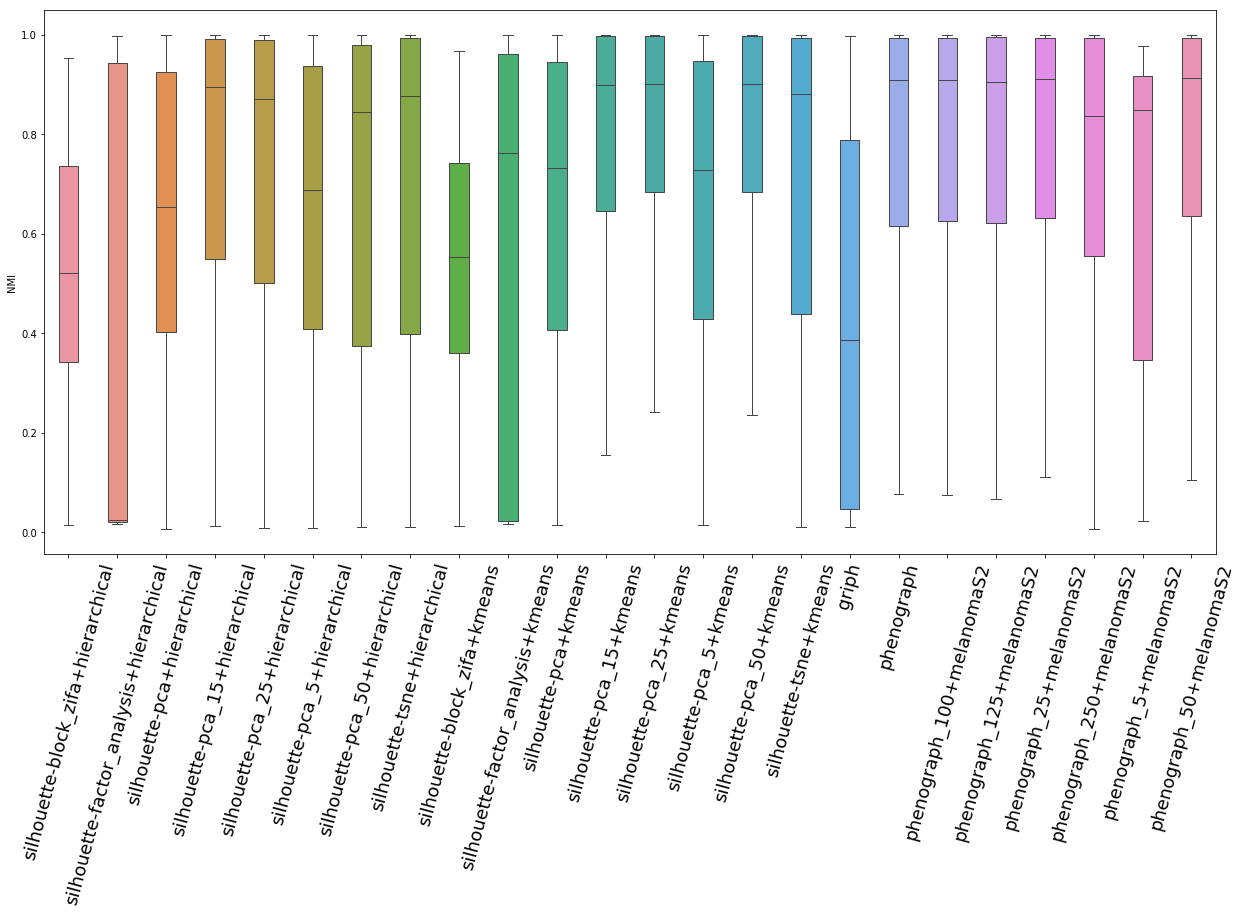

In [9]:
# all 63 simutions
Markdown('### Mean and standard deviation of the NMI value over 63 simulations')
all_nmi = pd.concat(df_list, axis=0)
all_nmi = all_nmi.rename(index=str, columns={"griph+melanomaS2": "griph", "phenograph+melanomaS2": "phenograph", "simlr+melanomaS2": "simlr",})
all_nmi.describe()

temp = plt.figure(figsize=(21,10))
bp = sns.boxplot(data=all_nmi, fliersize=0, width=0.4, linewidth=1)
bp = bp.set_ylabel('NMI')
bp = plt.xticks(fontsize= 18, rotation=75)
plt.show()

## Evaluation of the clustering methods

### *number of clusters = 5, de probability = 0.05*

silhouette-block_zifa+hierarchical  \
0.5                             0.060457   
0.75                            0.340512   
1.0                             0.551725   
1.25                            0.645054   
1.5                             0.743637   
2.0                             0.671029   
2.5                             0.849610   

      silhouette-factor_analysis+hierarchical  silhouette-pca+hierarchical  \
0.5                                  0.016096                     0.052107   
0.75                                 0.017640                     0.274380   
1.0                                  0.018653                     0.678652   
1.25                                 0.018458                     0.901638   
1.5                                  0.018814                     0.974336   
2.0                                  0.939652                     0.994772   
2.5                                  0.951476                     1.000000   

      silhouette-pca_15+hierarchical  silhouette-pca_25+hierarchical  \
0.5                         0.011521                        0.021215   
0.75                        0.251651                        0.171583   
1.0                         0.601280                        0.545807   
1.25                        0.831970                        0.786694   
1.5                         0.937271                        0.935647   
2.0                         0.993884                        0.992766   
2.5                         0.997945                        1.000000   

      silhouette-pca_5+hierarchical  silhouette-pca_50+hierarchical  \
0.5                        0.053445                        0.021419   
0.75                       0.323210                        0.157026   
1.0                        0.692422                        0.474939   
1.25                       0.900077                        0.732527   
1.5                        0.972315                        0.897244   
2.0                        0.997945                        0.987895   
2.5                        1.000000                        1.000000   

      silhouette-tsne+hierarchical  silhouette-block_zifa+kmeans  \
0.5                       0.021332                      0.065365   
0.75                      0.163656                      0.356052   
1.0                       0.535985                      0.615209   
1.25                      0.841528                      0.671155   
1.5                       0.963775                      0.745998   
2.0                       0.997945                      0.697325   
2.5                       1.000000                      0.848039   

      silhouette-factor_analysis+kmeans            ...             \
0.5                            0.022261            ...              
0.75                           0.024470            ...              
1.0                            0.238685            ...              
1.25                           0.861763            ...              
1.5                            0.976938            ...              
2.0                            0.961639            ...              
2.5                            0.967015            ...              

      silhouette-pca_50+kmeans  silhouette-tsne+kmeans     griph  phenograph  \
0.5                   0.026356                0.016623  0.022745    0.076081   
0.75                  0.403470                0.150534  0.083825    0.397263   
1.0                   0.815479                0.590013  0.154551    0.772416   
1.25                  0.949792                0.868492  0.410303    0.938628   
1.5                   0.976491                0.957986  0.759928    0.973816   
2.0                   0.997945                0.997945  0.867088    0.997945   
2.5                   1.000000                1.000000  0.902975    1.000000   

      phenograph_100+melanomaS2  phenograph_125+melanomaS2  \
0.5                    0.074045                   0.066203   
0.75               

#### *descriptive statistics*

silhouette-block_zifa+hierarchical  \
count                            7.000000   
mean                             0.551718   
std                              0.269093   
min                              0.060457   
25%                              0.446119   
50%                              0.645054   
75%                              0.707333   
max                              0.849610   

       silhouette-factor_analysis+hierarchical  silhouette-pca+hierarchical  \
count                                 7.000000                     7.000000   
mean                                  0.282970                     0.696555   
std                                   0.452652                     0.386027   
min                                   0.016096                     0.052107   
25%                                   0.018049                     0.476516   
50%                                   0.018653                     0.901638   
75%                                   0.479233                     0.984554   
max                                   0.951476                     1.000000   

       silhouette-pca_15+hierarchical  silhouette-pca_25+hierarchical  \
count                        7.000000                        7.000000   
mean                         0.660789                        0.636245   
std                          0.392185                        0.402917   
min                          0.011521                        0.021215   
25%                          0.426465                        0.358695   
50%                          0.831970                        0.786694   
75%                          0.965577                        0.964207   
max                          0.997945                        1.000000   

       silhouette-pca_5+hierarchical  silhouette-pca_50+hierarchical  \
count                       7.000000                        7.000000   
mean                        0.705630                        0.610150   
std                         0.377005                        0.400475   
min                         0.053445                        0.021419   
25%                         0.507816                        0.315982   
50%                         0.900077                        0.732527   
75%                         0.985130                        0.942570   
max                         1.000000                        1.000000   

       silhouette-tsne+hierarchical  silhouette-block_zifa+kmeans  \
count                      7.000000                      7.000000   
mean                       0.646317                      0.571306   
std                        0.412989                      0.269934   
min                        0.021332                      0.065365   
25%                        0.349821                      0.485631   
50%                        0.841528                      0.671155   
75%                        0.980860                      0.721662   
max                        1.000000                      0.848039   

       silhouette-factor_analysis+kmeans            ...             \
count                           7.000000            ...              
mean                            0.578967            ...              
std                             0.459811            ...              
min                             0.022261            ...              
25%                             0.131578            ...              
50%                             0.861763            ...              
75%                             0.964327            ...              
max                             0.976938            ...              

       silhouette-pca_50+kmeans  silhouette-tsne+kmeans     griph  phenograph  \
count                  7.000000                7.000000  7.000000    7.000000   
mean                   0.738505                0.654513  0.457345    0.736593   
std                    0.379099                0.416383  0.383041    0.362281   
min  

#### *NMI score over various loc values*

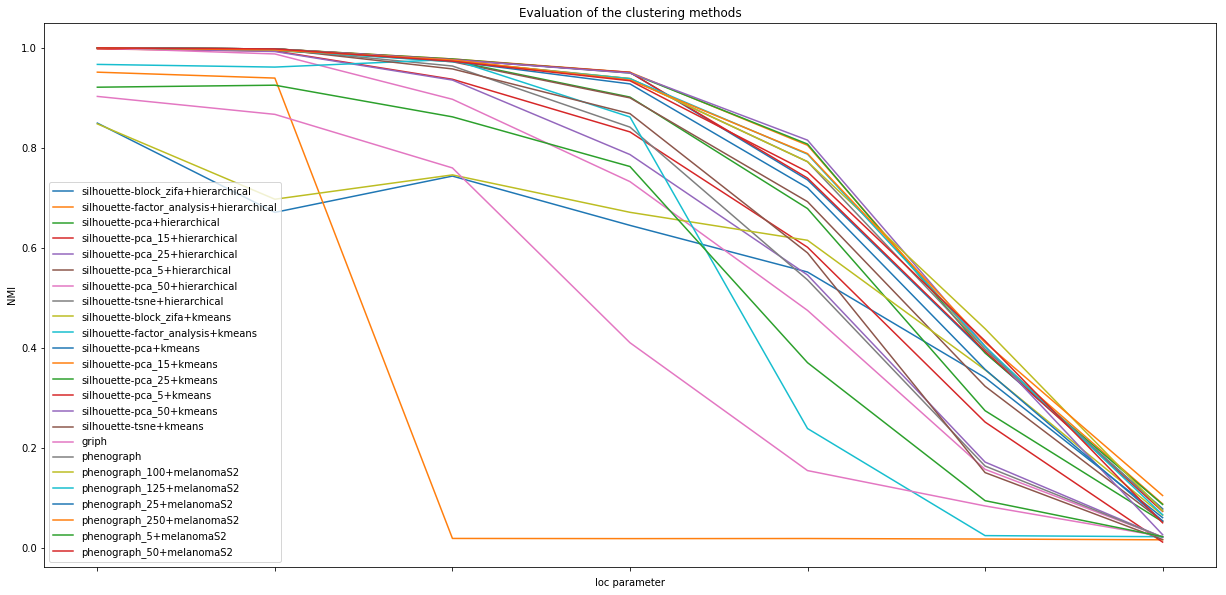

#### *Summary of the NMI score*

/cluster/work/bewi/members/tuncel/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


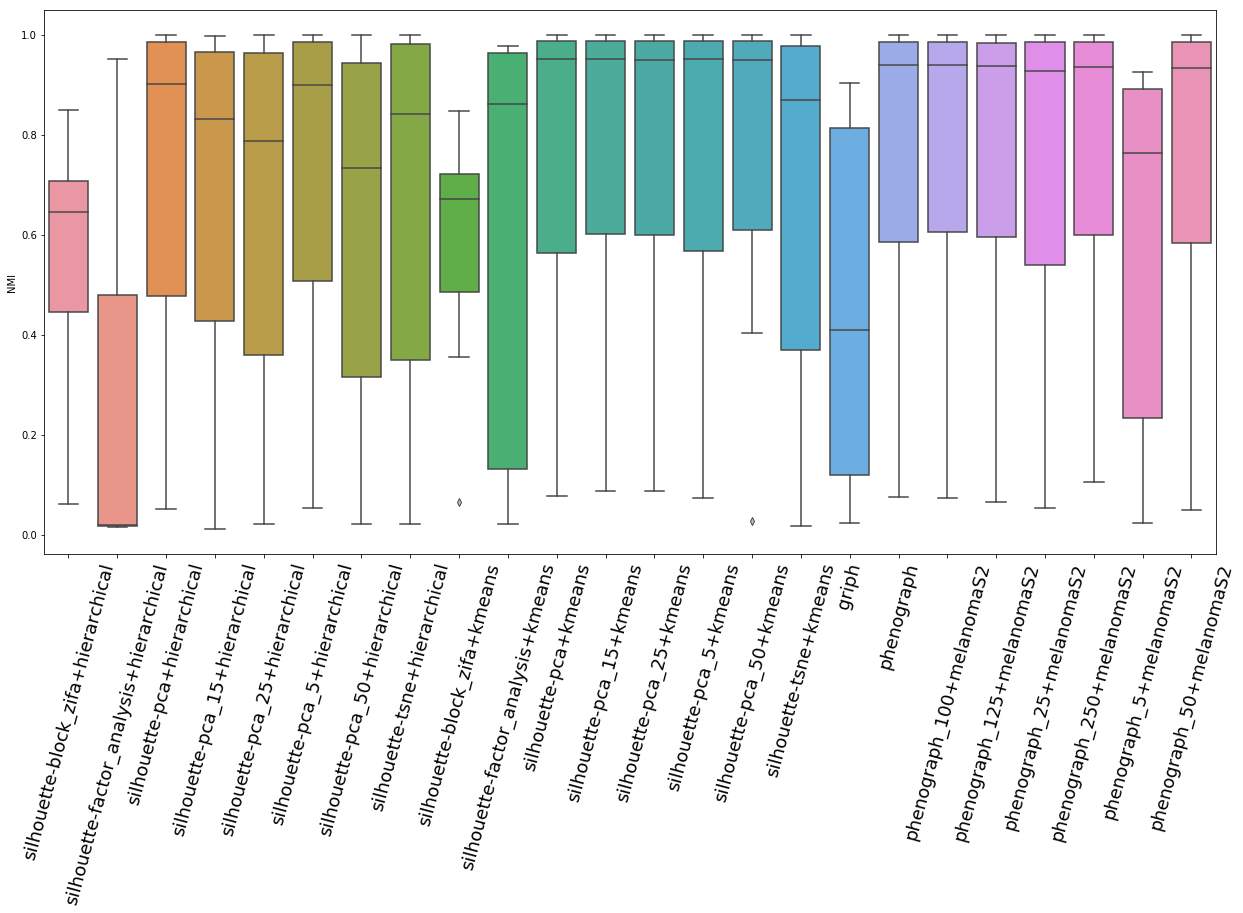

### *number of clusters = 5, de probability = 0.1*

silhouette-block_zifa+hierarchical  \
0.5                             0.247965   
0.75                            0.556918   
1.0                             0.671987   
1.25                            0.757277   
1.5                             0.806638   
2.0                             0.910815   
2.5                             0.858594   

      silhouette-factor_analysis+hierarchical  silhouette-pca+hierarchical  \
0.5                                  0.017087                     0.323896   
0.75                                 0.019591                     0.654404   
1.0                                  0.019212                     0.905729   
1.25                                 0.017293                     0.975255   
1.5                                  0.955416                     0.995919   
2.0                                  0.960686                     1.000000   
2.5                                  0.952057                     1.000000   

      silhouette-pca_15+hierarchical  silhouette-pca_25+hierarchical  \
0.5                         0.265525                        0.240749   
0.75                        0.601684                        0.582126   
1.0                         0.883953                        0.863456   
1.25                        0.949272                        0.936017   
1.5                         0.990177                        0.990177   
2.0                         1.000000                        0.997955   
2.5                         1.000000                        1.000000   

      silhouette-pca_5+hierarchical  silhouette-pca_50+hierarchical  \
0.5                        0.342426                        0.136672   
0.75                       0.687194                        0.447634   
1.0                        0.930950                        0.793909   
1.25                       0.975255                        0.918317   
1.5                        0.995919                        0.977092   
2.0                        1.000000                        1.000000   
2.5                        1.000000                        1.000000   

      silhouette-tsne+hierarchical  silhouette-block_zifa+kmeans  \
0.5                       0.190588                      0.248856   
0.75                      0.552442                      0.565726   
1.0                       0.842133                      0.731870   
1.25                      0.958716                      0.782678   
1.5                       0.989833                      0.830571   
2.0                       0.998959                      0.924833   
2.5                       1.000000                      0.872306   

      silhouette-factor_analysis+kmeans            ...             \
0.5                            0.017087            ...              
0.75                           0.019591            ...              
1.0                            0.904667            ...              
1.25                           0.970461            ...              
1.5                            0.959082            ...              
2.0                            0.973753            ...              
2.5                            0.957179            ...              

      silhouette-pca_50+kmeans  silhouette-tsne+kmeans     griph  phenograph  \
0.5                   0.424784                0.186326  0.053477    0.390717   
0.75                  0.793766                0.586444  0.255243    0.756596   
1.0                   0.944498                0.881673  0.382879    0.942235   
1.25                  0.988490                0.960177  0.770772    0.983177   
1.5                   0.995919                0.989833  0.889970    0.997925   
2.0                   1.000000                0.998959  0.855826    1.000000   
2.5                   1.000000                1.000000  0.948143    1.000000   

      phenograph_100+melanomaS2  phenograph_125+melanomaS2  \
0.5                    0.383095                   0.448809   
0.75               

#### *descriptive statistics*

silhouette-block_zifa+hierarchical  \
count                            7.000000   
mean                             0.687170   
std                              0.226821   
min                              0.247965   
25%                              0.614453   
50%                              0.757277   
75%                              0.832616   
max                              0.910815   

       silhouette-factor_analysis+hierarchical  silhouette-pca+hierarchical  \
count                                 7.000000                     7.000000   
mean                                  0.420192                     0.836458   
std                                   0.501259                     0.257826   
min                                   0.017087                     0.323896   
25%                                   0.018253                     0.780067   
50%                                   0.019591                     0.975255   
75%                                   0.953737                     0.997959   
max                                   0.960686                     1.000000   

       silhouette-pca_15+hierarchical  silhouette-pca_25+hierarchical  \
count                        7.000000                        7.000000   
mean                         0.812945                        0.801497   
std                          0.279678                        0.288125   
min                          0.265525                        0.240749   
25%                          0.742819                        0.722791   
50%                          0.949272                        0.936017   
75%                          0.995089                        0.994066   
max                          1.000000                        1.000000   

       silhouette-pca_5+hierarchical  silhouette-pca_50+hierarchical  \
count                       7.000000                        7.000000   
mean                        0.847392                        0.753375   
std                         0.249207                        0.335248   
min                         0.342426                        0.136672   
25%                         0.809072                        0.620772   
50%                         0.975255                        0.918317   
75%                         0.997959                        0.988546   
max                         1.000000                        1.000000   

       silhouette-tsne+hierarchical  silhouette-block_zifa+kmeans  \
count                      7.000000                      7.000000   
mean                       0.790382                      0.708120   
std                        0.309464                      0.233180   
min                        0.190588                      0.248856   
25%                        0.697287                      0.648798   
50%                        0.958716                      0.782678   
75%                        0.994396                      0.851438   
max                        1.000000                      0.924833   

       silhouette-factor_analysis+kmeans            ...             \
count                           7.000000            ...              
mean                            0.685974            ...              
std                             0.456653            ...              
min                             0.017087            ...              
25%                             0.462129            ...              
50%                             0.957179            ...              
75%                             0.964771            ...              
max                             0.973753            ...              

       silhouette-pca_50+kmeans  silhouette-tsne+kmeans     griph  phenograph  \
count                  7.000000                7.000000  7.000000    7.000000   
mean                   0.878208                0.800487  0.593758    0.867236   
std                    0.213230                0.308261  0.356910    0.227564   
min  

#### *NMI score over various loc values*

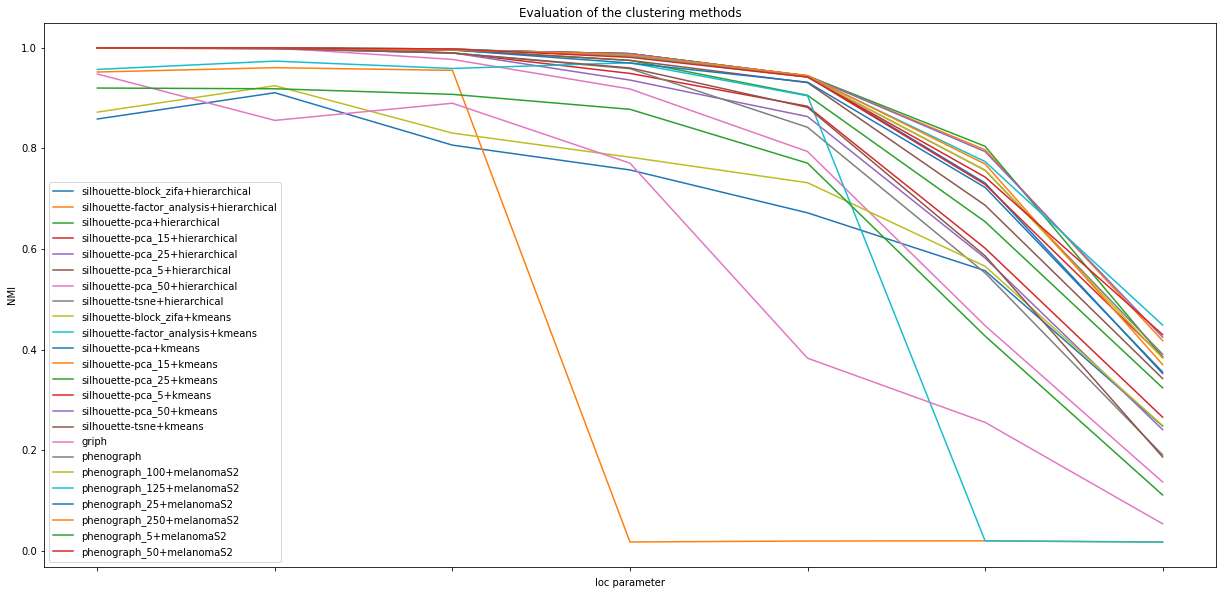

#### *Summary of the NMI score*

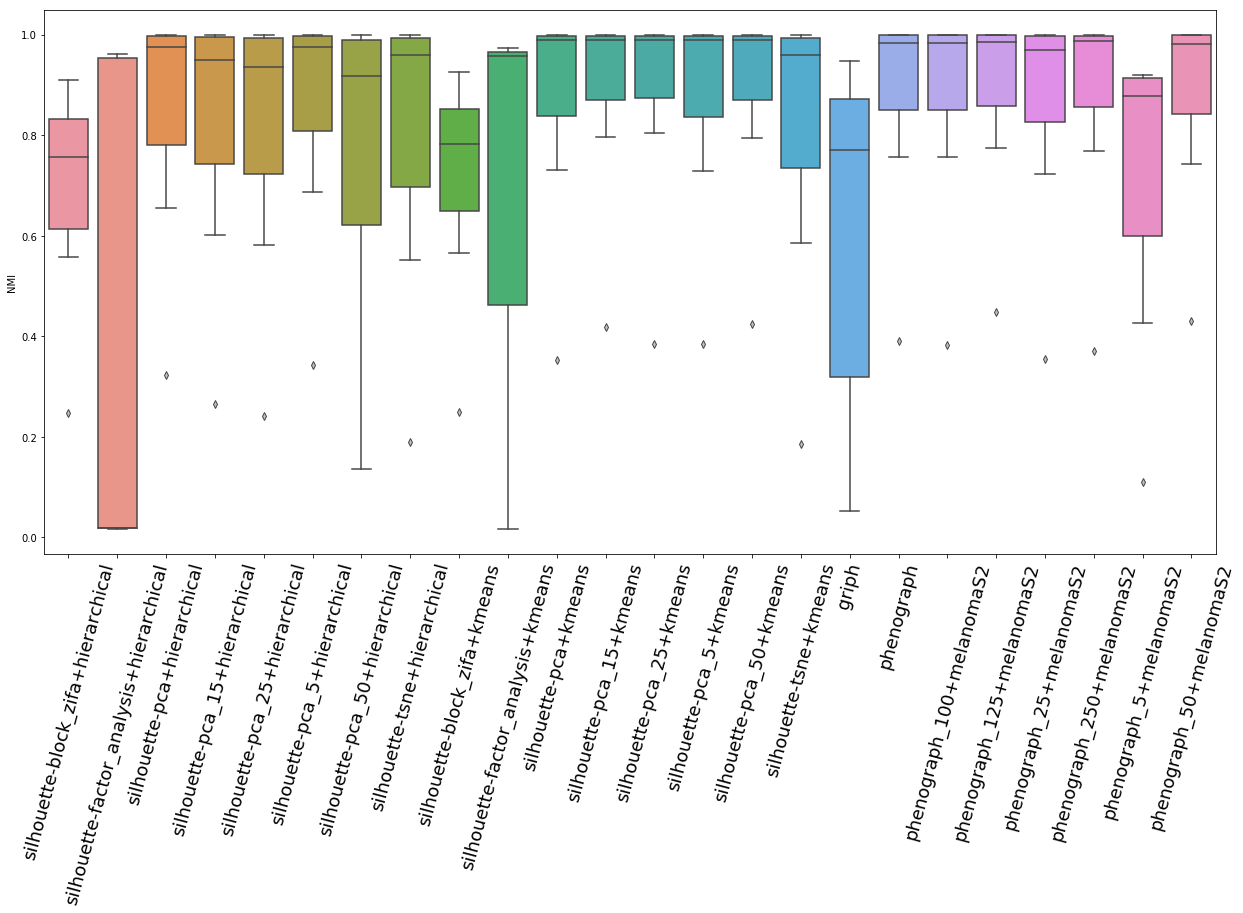

### *number of clusters = 5, de probability = 0.15*

silhouette-block_zifa+hierarchical  \
0.5                             0.607119   
0.75                            0.710255   
1.0                             0.870621   
1.25                            0.945531   
1.5                             0.953438   
2.0                             0.930864   
2.5                             0.939811   

      silhouette-factor_analysis+hierarchical  silhouette-pca+hierarchical  \
0.5                                  0.021695                     0.602559   
0.75                                 0.016689                     0.898337   
1.0                                  0.937238                     0.994258   
1.25                                 0.922433                     0.998014   
1.5                                  0.950393                     1.000000   
2.0                                  0.973802                     1.000000   
2.5                                  0.962504                     1.000000   

      silhouette-pca_15+hierarchical  silhouette-pca_25+hierarchical  \
0.5                         0.550652                        0.477760   
0.75                        0.863045                        0.828595   
1.0                         0.994171                        0.982909   
1.25                        0.998014                        0.995928   
1.5                         1.000000                        1.000000   
2.0                         1.000000                        1.000000   
2.5                         1.000000                        1.000000   

      silhouette-pca_5+hierarchical  silhouette-pca_50+hierarchical  \
0.5                        0.646567                        0.441366   
0.75                       0.893477                        0.773091   
1.0                        0.994258                        0.972074   
1.25                       0.998014                        0.986666   
1.5                        1.000000                        1.000000   
2.0                        1.000000                        1.000000   
2.5                        1.000000                        1.000000   

      silhouette-tsne+hierarchical  silhouette-block_zifa+kmeans  \
0.5                       0.450910                      0.638671   
0.75                      0.858307                      0.800906   
1.0                       0.984288                      0.910269   
1.25                      0.996975                      0.966460   
1.5                       0.995708                      0.963916   
2.0                       0.999036                      0.935294   
2.5                       0.998177                      0.946778   

      silhouette-factor_analysis+kmeans            ...             \
0.5                            0.017370            ...              
0.75                           0.863885            ...              
1.0                            0.968407            ...              
1.25                           0.959806            ...              
1.5                            0.953792            ...              
2.0                            0.978530            ...              
2.5                            0.985461            ...              

      silhouette-pca_50+kmeans  silhouette-tsne+kmeans     griph  phenograph  \
0.5                   0.761805                0.462771  0.023686    0.731811   
0.75                  0.942373                0.850857  0.371299    0.930627   
1.0                   0.995939                0.985545  0.770305    0.990545   
1.25                  0.998014                0.996975  0.868328    0.998014   
1.5                   1.000000                0.995752  0.876969    1.000000   
2.0                   1.000000                1.000000  0.867328    1.000000   
2.5                   1.000000                0.998177  0.902575    1.000000   

      phenograph_100+melanomaS2  phenograph_125+melanomaS2  \
0.5                    0.733805                   0.733380   
0.75               

#### *descriptive statistics*

silhouette-block_zifa+hierarchical  \
count                            7.000000   
mean                             0.851091   
std                              0.137457   
min                              0.607119   
25%                              0.790438   
50%                              0.930864   
75%                              0.942671   
max                              0.953438   

       silhouette-factor_analysis+hierarchical  silhouette-pca+hierarchical  \
count                                 7.000000                     7.000000   
mean                                  0.683536                     0.927595   
std                                   0.454137                     0.148119   
min                                   0.016689                     0.602559   
25%                                   0.472064                     0.946297   
50%                                   0.937238                     0.998014   
75%                                   0.956449                     1.000000   
max                                   0.973802                     1.000000   

       silhouette-pca_15+hierarchical  silhouette-pca_25+hierarchical  \
count                        7.000000                        7.000000   
mean                         0.915126                        0.897885   
std                          0.168465                        0.195546   
min                          0.550652                        0.477760   
25%                          0.928608                        0.905752   
50%                          0.998014                        0.995928   
75%                          1.000000                        1.000000   
max                          1.000000                        1.000000   

       silhouette-pca_5+hierarchical  silhouette-pca_50+hierarchical  \
count                       7.000000                        7.000000   
mean                        0.933188                        0.881885   
std                         0.132320                        0.210895   
min                         0.646567                        0.441366   
25%                         0.943867                        0.872582   
50%                         0.998014                        0.986666   
75%                         1.000000                        1.000000   
max                         1.000000                        1.000000   

       silhouette-tsne+hierarchical  silhouette-block_zifa+kmeans  \
count                      7.000000                      7.000000   
mean                       0.897629                      0.880328   
std                        0.203509                      0.120723   
min                        0.450910                      0.638671   
25%                        0.921298                      0.855587   
50%                        0.995708                      0.935294   
75%                        0.997576                      0.955347   
max                        0.999036                      0.966460   

       silhouette-factor_analysis+kmeans            ...             \
count                           7.000000            ...              
mean                            0.818179            ...              
std                             0.355457            ...              
min                             0.017370            ...              
25%                             0.908838            ...              
50%                             0.959806            ...              
75%                             0.973468            ...              
max                             0.985461            ...              

       silhouette-pca_50+kmeans  silhouette-tsne+kmeans     griph  phenograph  \
count                  7.000000                7.000000  7.000000    7.000000   
mean                   0.956876                0.898583  0.668641    0.950142   
std                    0.088563                0.199624  0.339655    0.099525   
min  

#### *NMI score over various loc values*

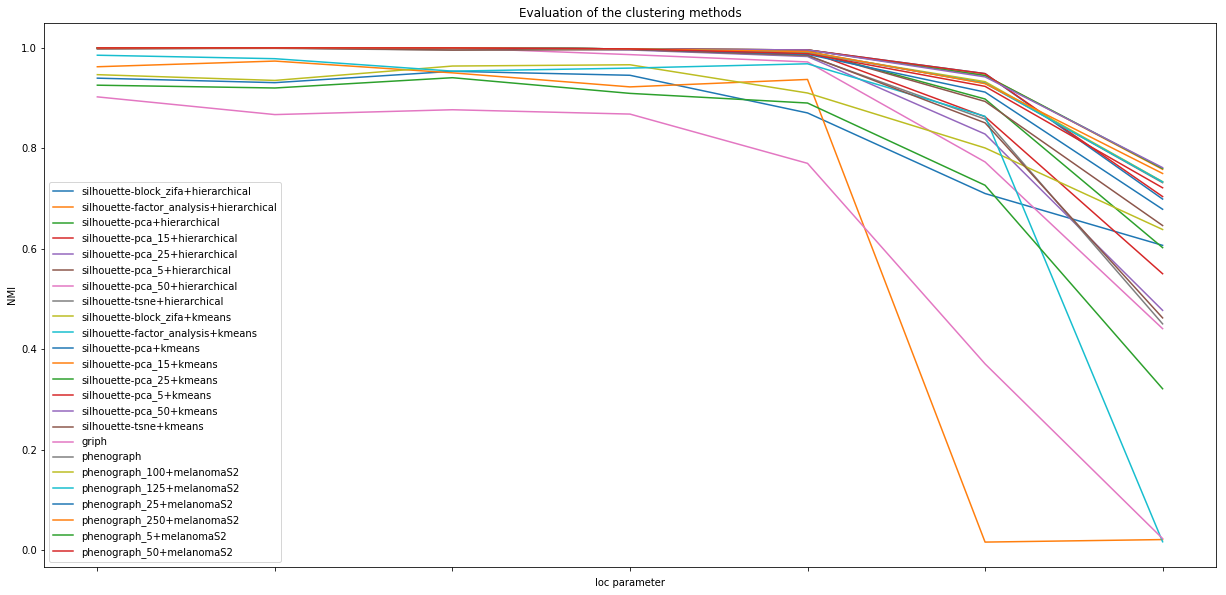

#### *Summary of the NMI score*

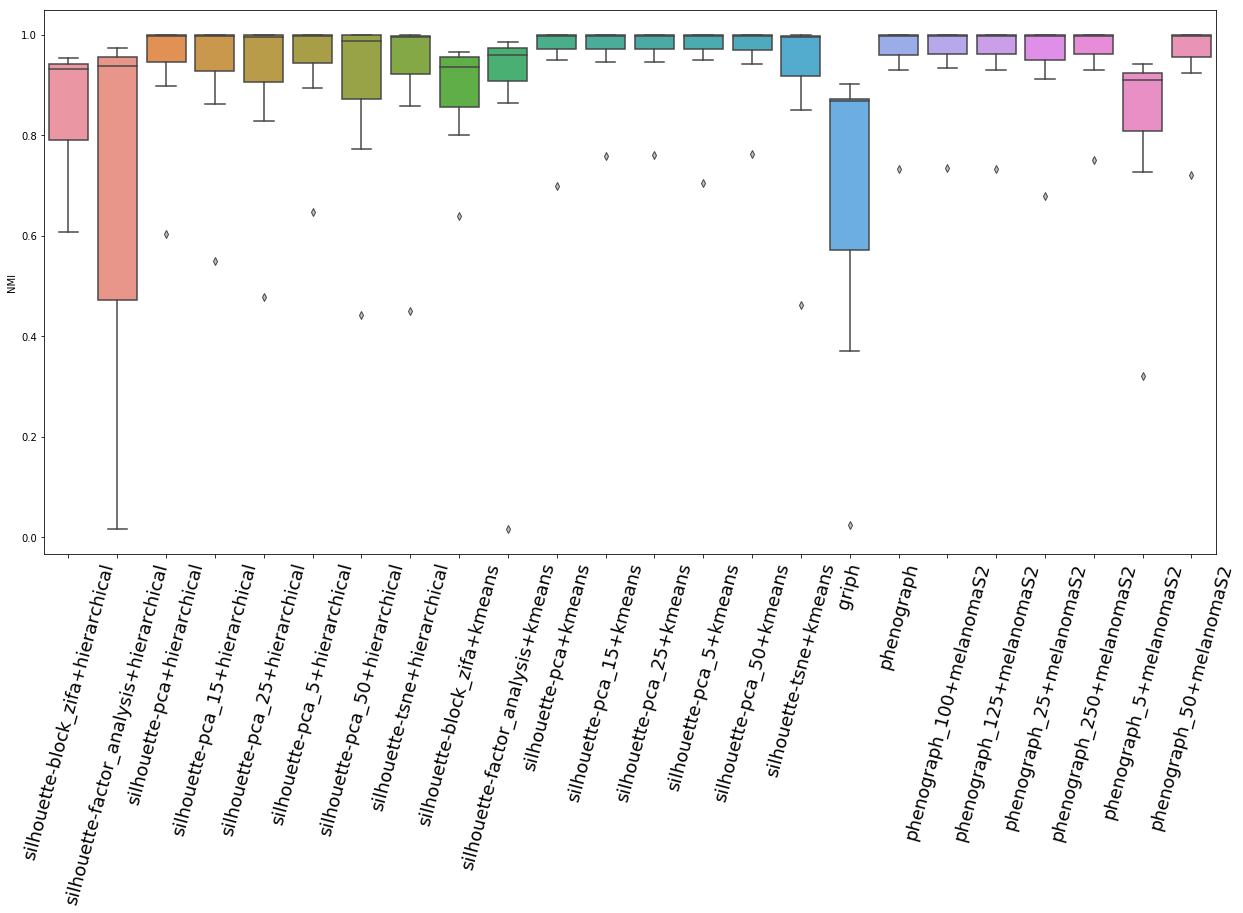

### *number of clusters = 9, de probability = 0.05*

silhouette-block_zifa+hierarchical  \
0.5                             0.016129   
0.75                            0.252232   
1.0                             0.409350   
1.25                            0.472667   
1.5                             0.554927   
2.0                             0.645024   
2.5                             0.665985   

      silhouette-factor_analysis+hierarchical  silhouette-pca+hierarchical  \
0.5                                  0.019996                     0.035151   
0.75                                 0.020209                     0.202807   
1.0                                  0.021341                     0.423187   
1.25                                 0.019638                     0.633183   
1.5                                  0.020746                     0.761606   
2.0                                  0.947710                     0.863202   
2.5                                  0.983348                     0.878592   

      silhouette-pca_15+hierarchical  silhouette-pca_25+hierarchical  \
0.5                         0.011998                        0.010432   
0.75                        0.154482                        0.103870   
1.0                         0.405130                        0.387835   
1.25                        0.728381                        0.718125   
1.5                         0.903093                        0.896853   
2.0                         0.987105                        0.981288   
2.5                         0.998637                        0.994873   

      silhouette-pca_5+hierarchical  silhouette-pca_50+hierarchical  \
0.5                        0.022607                        0.014353   
0.75                       0.174529                        0.074281   
1.0                        0.412663                        0.313537   
1.25                       0.663703                        0.588472   
1.5                        0.770697                        0.843463   
2.0                        0.863202                        0.973578   
2.5                        0.878592                        0.995897   

      silhouette-tsne+hierarchical  silhouette-block_zifa+kmeans  \
0.5                       0.014174                      0.027219   
0.75                      0.120656                      0.273153   
1.0                       0.275014                      0.412379   
1.25                      0.692301                      0.478381   
1.5                       0.912419                      0.560414   
2.0                       0.991913                      0.645521   
2.5                       0.993496                      0.691006   

      silhouette-factor_analysis+kmeans            ...             \
0.5                            0.019996            ...              
0.75                           0.020209            ...              
1.0                            0.020614            ...              
1.25                           0.027940            ...              
1.5                            0.021137            ...              
2.0                            0.949609            ...              
2.5                            0.995350            ...              

      silhouette-pca_50+kmeans  silhouette-tsne+kmeans     griph  phenograph  \
0.5                   0.016978                0.011146  0.010061    0.033389   
0.75                  0.234690                0.117738  0.023544    0.249724   
1.0                   0.611402                0.338917  0.028843    0.564028   
1.25                  0.831173                0.698351  0.129592    0.829742   
1.5                   0.939463                0.915617  0.424015    0.903220   
2.0                   0.995871                0.991913  0.754727    0.993490   
2.5                   0.998668                0.993496  0.827229    0.993550   

      phenograph_100+melanomaS2  phenograph_125+melanomaS2  \
0.5                    0.023387                   0.042729   
0.75               

#### *descriptive statistics*

silhouette-block_zifa+hierarchical  \
count                            7.000000   
mean                             0.430902   
std                              0.231899   
min                              0.016129   
25%                              0.330791   
50%                              0.472667   
75%                              0.599975   
max                              0.665985   

       silhouette-factor_analysis+hierarchical  silhouette-pca+hierarchical  \
count                                 7.000000                     7.000000   
mean                                  0.290427                     0.542533   
std                                   0.461298                     0.331428   
min                                   0.019638                     0.035151   
25%                                   0.020103                     0.312997   
50%                                   0.020746                     0.633183   
75%                                   0.484525                     0.812404   
max                                   0.983348                     0.878592   

       silhouette-pca_15+hierarchical  silhouette-pca_25+hierarchical  \
count                        7.000000                        7.000000   
mean                         0.598404                        0.584754   
std                          0.408105                        0.416434   
min                          0.011998                        0.010432   
25%                          0.279806                        0.245852   
50%                          0.728381                        0.718125   
75%                          0.945099                        0.939070   
max                          0.998637                        0.994873   

       silhouette-pca_5+hierarchical  silhouette-pca_50+hierarchical  \
count                       7.000000                        7.000000   
mean                        0.540856                        0.543369   
std                         0.342808                        0.415266   
min                         0.022607                        0.014353   
25%                         0.293596                        0.193909   
50%                         0.663703                        0.588472   
75%                         0.816949                        0.908520   
max                         0.878592                        0.995897   

       silhouette-tsne+hierarchical  silhouette-block_zifa+kmeans  \
count                      7.000000                      7.000000   
mean                       0.571425                      0.441153   
std                        0.425720                      0.231011   
min                        0.014174                      0.027219   
25%                        0.197835                      0.342766   
50%                        0.692301                      0.478381   
75%                        0.952166                      0.602967   
max                        0.993496                      0.691006   

       silhouette-factor_analysis+kmeans            ...             \
count                           7.000000            ...              
mean                            0.293551            ...              
std                             0.463993            ...              
min                             0.019996            ...              
25%                             0.020412            ...              
50%                             0.021137            ...              
75%                             0.488775            ...              
max                             0.995350            ...              

       silhouette-pca_50+kmeans  silhouette-tsne+kmeans     griph  phenograph  \
count                  7.000000                7.000000  7.000000    7.000000   
mean                   0.661178                0.581025  0.314001    0.652449   
std                    0.394044                0.420851  0.356327    0.383018   
min  

#### *NMI score over various loc values*

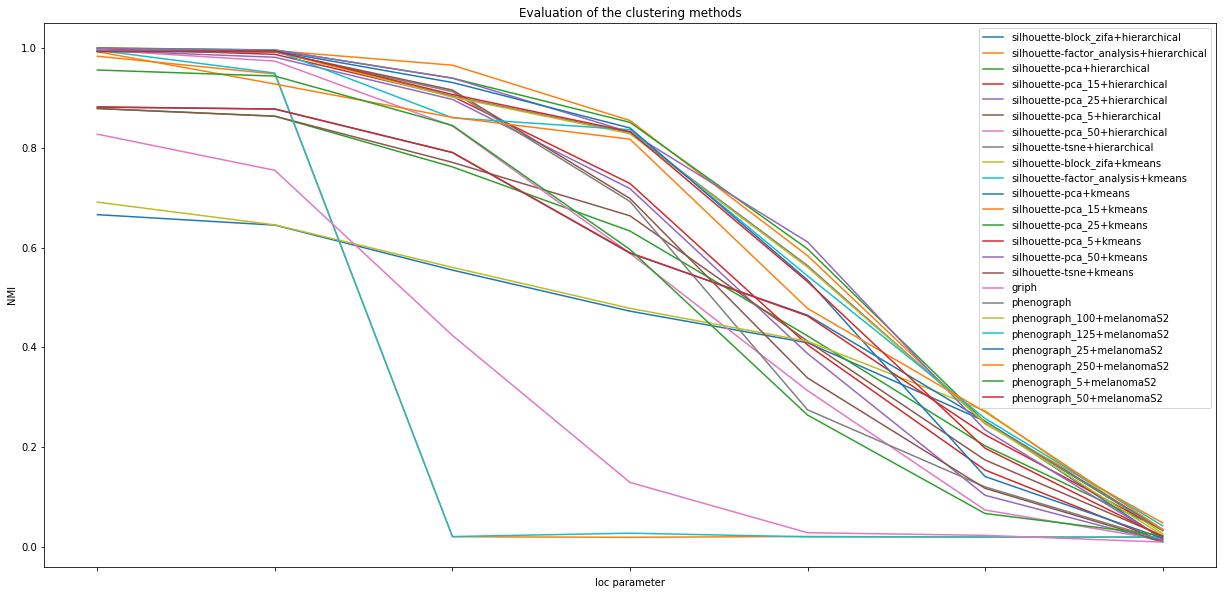

#### *Summary of the NMI score*

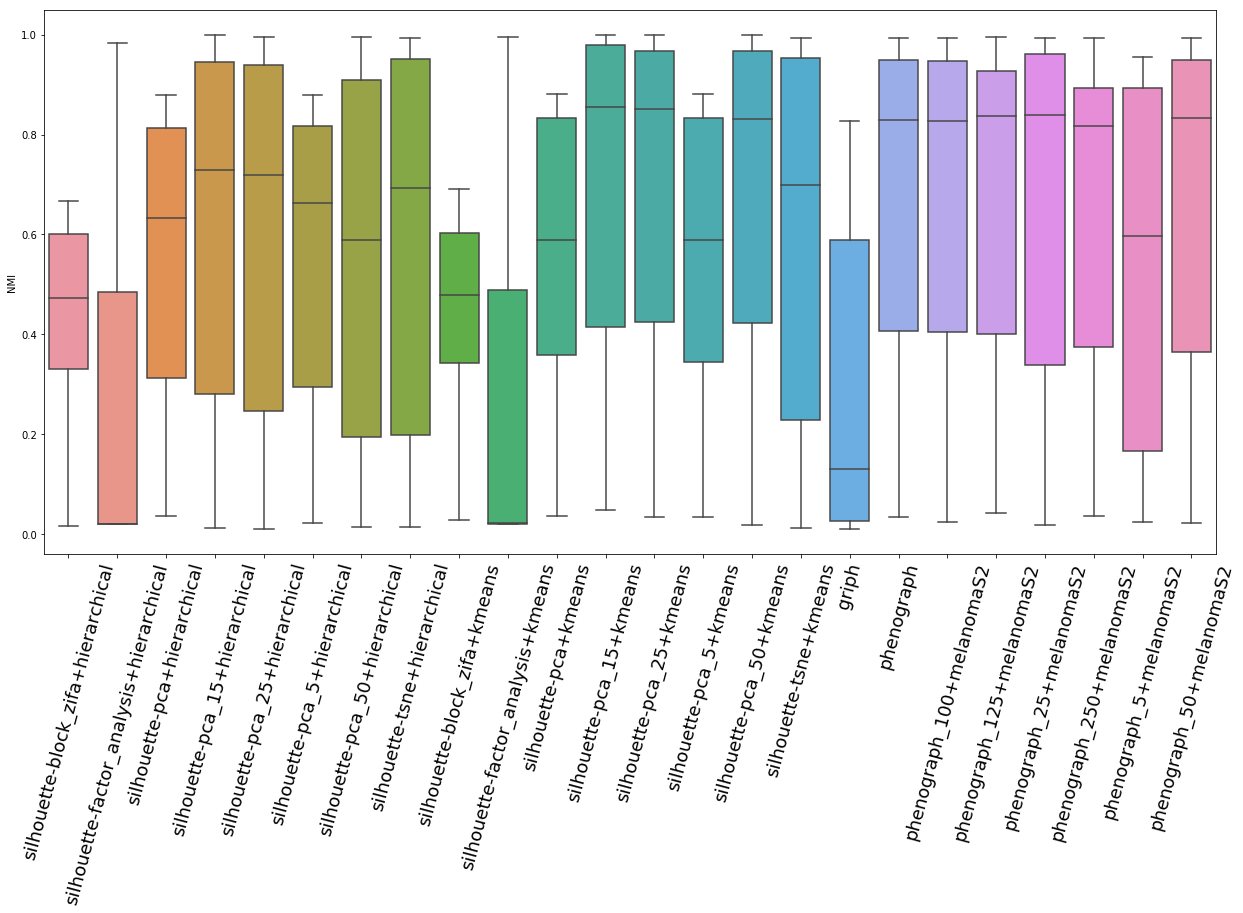

### *number of clusters = 9, de probability = 0.1*

silhouette-block_zifa+hierarchical  \
0.5                             0.138753   
0.75                            0.295276   
1.0                             0.487830   
1.25                            0.639388   
1.5                             0.665464   
2.0                             0.751883   
2.5                             0.740245   

      silhouette-factor_analysis+hierarchical  silhouette-pca+hierarchical  \
0.5                                  0.021864                     0.137370   
0.75                                 0.020332                     0.338018   
1.0                                  0.299738                     0.606523   
1.25                                 0.894516                     0.775676   
1.5                                  0.982992                     0.832585   
2.0                                  0.996533                     0.943704   
2.5                                  0.985305                     0.969699   

      silhouette-pca_15+hierarchical  silhouette-pca_25+hierarchical  \
0.5                         0.104032                        0.086944   
0.75                        0.444303                        0.317398   
1.0                         0.811677                        0.790293   
1.25                        0.953762                        0.907145   
1.5                         0.990701                        0.992111   
2.0                         1.000000                        0.998633   
2.5                         1.000000                        1.000000   

      silhouette-pca_5+hierarchical  silhouette-pca_50+hierarchical  \
0.5                        0.112265                        0.057725   
0.75                       0.342644                        0.268987   
1.0                        0.592603                        0.700978   
1.25                       0.780815                        0.902610   
1.5                        0.832585                        0.983421   
2.0                        0.943704                        0.997243   
2.5                        0.969699                        1.000000   

      silhouette-tsne+hierarchical  silhouette-block_zifa+kmeans  \
0.5                       0.076729                      0.142397   
0.75                      0.158360                      0.245565   
1.0                       0.738360                      0.504711   
1.25                      0.961169                      0.660861   
1.5                       0.996031                      0.683508   
2.0                       0.998004                      0.756300   
2.5                       1.000000                      0.736079   

      silhouette-factor_analysis+kmeans            ...             \
0.5                            0.021864            ...              
0.75                           0.020332            ...              
1.0                            0.368354            ...              
1.25                           0.895922            ...              
1.5                            0.991724            ...              
2.0                            0.998653            ...              
2.5                            0.989109            ...              

      silhouette-pca_50+kmeans  silhouette-tsne+kmeans     griph  phenograph  \
0.5                   0.122588                0.079440  0.027421    0.140645   
0.75                  0.664617                0.221040  0.036620    0.550666   
1.0                   0.924037                0.770021  0.091495    0.900689   
1.25                  0.988212                0.963506  0.438943    0.953699   
1.5                   0.997363                0.996031  0.732085    0.994683   
2.0                   1.000000                0.998004  0.926954    1.000000   
2.5                   1.000000                1.000000  0.987196    1.000000   

      phenograph_100+melanomaS2  phenograph_125+melanomaS2  \
0.5                    0.160030                   0.147691   
0.75               

#### *descriptive statistics*

silhouette-block_zifa+hierarchical  \
count                            7.000000   
mean                             0.531263   
std                              0.235828   
min                              0.138753   
25%                              0.391553   
50%                              0.639388   
75%                              0.702854   
max                              0.751883   

       silhouette-factor_analysis+hierarchical  silhouette-pca+hierarchical  \
count                                 7.000000                     7.000000   
mean                                  0.600183                     0.657653   
std                                   0.465391                     0.316018   
min                                   0.020332                     0.137370   
25%                                   0.160801                     0.472270   
50%                                   0.894516                     0.775676   
75%                                   0.984149                     0.888144   
max                                   0.996533                     0.969699   

       silhouette-pca_15+hierarchical  silhouette-pca_25+hierarchical  \
count                        7.000000                        7.000000   
mean                         0.757782                        0.727503   
std                          0.350847                        0.372492   
min                          0.104032                        0.086944   
25%                          0.627990                        0.553845   
50%                          0.953762                        0.907145   
75%                          0.995351                        0.995372   
max                          1.000000                        1.000000   

       silhouette-pca_5+hierarchical  silhouette-pca_50+hierarchical  \
count                       7.000000                        7.000000   
mean                        0.653474                        0.701566   
std                         0.322943                        0.386869   
min                         0.112265                        0.057725   
25%                         0.467624                        0.484982   
50%                         0.780815                        0.902610   
75%                         0.888144                        0.990332   
max                         0.969699                        1.000000   

       silhouette-tsne+hierarchical  silhouette-block_zifa+kmeans  \
count                      7.000000                      7.000000   
mean                       0.704093                      0.532774   
std                        0.411875                      0.247014   
min                        0.076729                      0.142397   
25%                        0.448360                      0.375138   
50%                        0.961169                      0.660861   
75%                        0.997018                      0.709793   
max                        1.000000                      0.756300   

       silhouette-factor_analysis+kmeans            ...             \
count                           7.000000            ...              
mean                            0.612280            ...              
std                             0.460834            ...              
min                             0.020332            ...              
25%                             0.195109            ...              
50%                             0.895922            ...              
75%                             0.990417            ...              
max                             0.998653            ...              

       silhouette-pca_50+kmeans  silhouette-tsne+kmeans     griph  phenograph  \
count                  7.000000                7.000000  7.000000    7.000000   
mean                   0.813831                0.718292  0.462959    0.791483   
std                    0.328034                0.398525  0.422801    0.328652   
min  

#### *NMI score over various loc values*

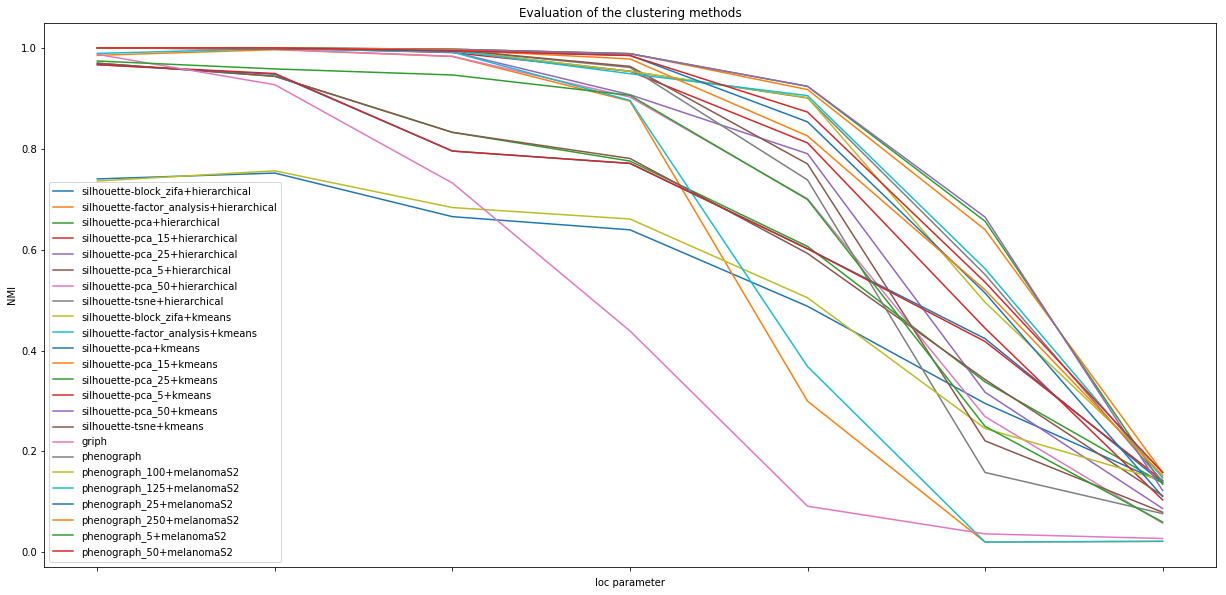

#### *Summary of the NMI score*

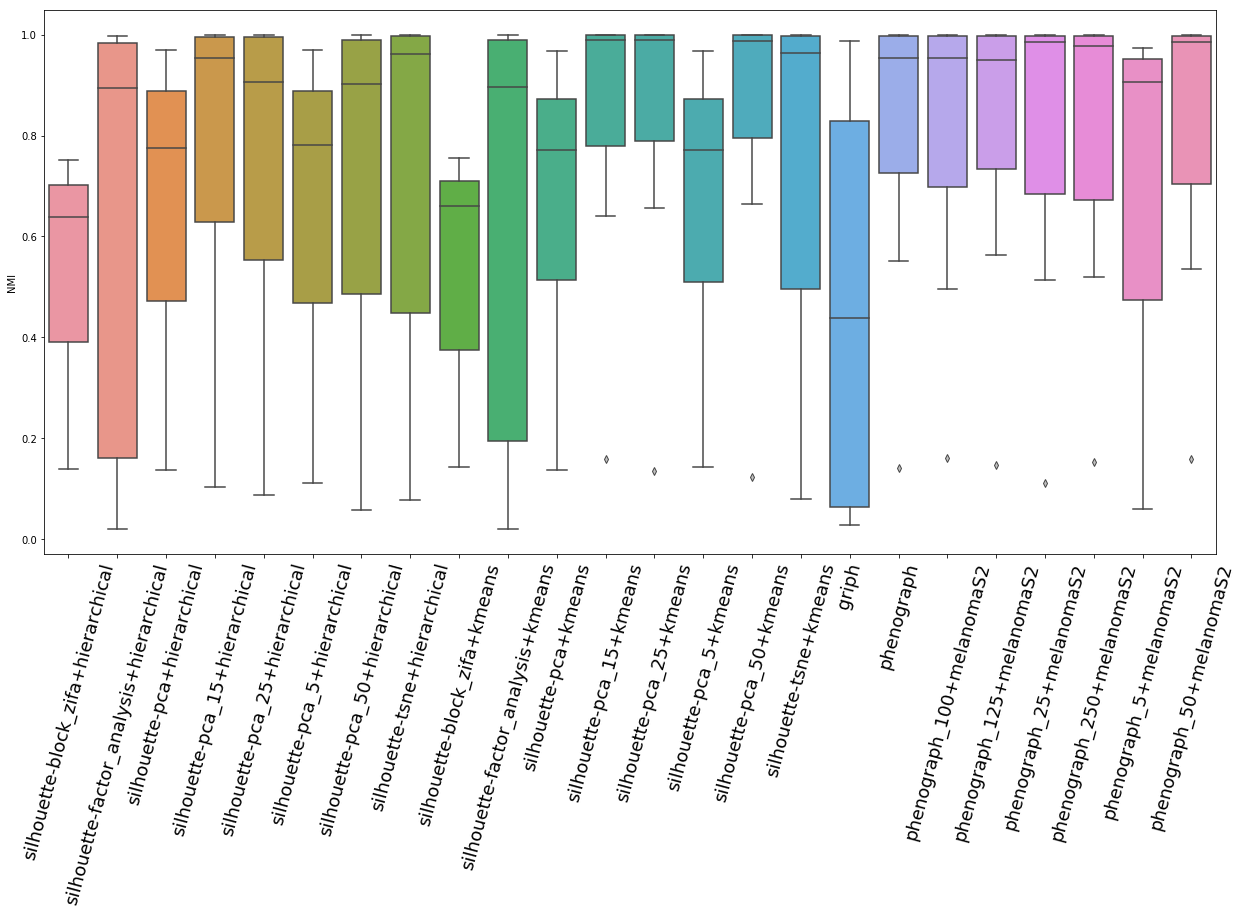

### *number of clusters = 9, de probability = 0.15*

silhouette-block_zifa+hierarchical  \
0.5                             0.357384   
0.75                            0.521415   
1.0                             0.565406   
1.25                            0.732071   
1.5                             0.766018   
2.0                             0.770349   
2.5                             0.765912   

      silhouette-factor_analysis+hierarchical  silhouette-pca+hierarchical  \
0.5                                  0.022636                     0.281709   
0.75                                 0.022193                     0.555294   
1.0                                  0.020456                     0.780681   
1.25                                 0.967289                     0.880958   
1.5                                  0.986354                     0.901177   
2.0                                  0.997965                     0.944313   
2.5                                  0.994359                     0.944313   

      silhouette-pca_15+hierarchical  silhouette-pca_25+hierarchical  \
0.5                         0.343720                        0.260688   
0.75                        0.764170                        0.749025   
1.0                         0.965517                        0.939255   
1.25                        0.995809                        0.990224   
1.5                         0.998690                        1.000000   
2.0                         1.000000                        1.000000   
2.5                         1.000000                        1.000000   

      silhouette-pca_5+hierarchical  silhouette-pca_50+hierarchical  \
0.5                        0.285999                        0.167674   
0.75                       0.534471                        0.652486   
1.0                        0.778037                        0.912496   
1.25                       0.880958                        0.994565   
1.5                        0.901177                        0.994634   
2.0                        0.944313                        1.000000   
2.5                        0.944313                        1.000000   

      silhouette-tsne+hierarchical  silhouette-block_zifa+kmeans  \
0.5                       0.225949                      0.372931   
0.75                      0.688664                      0.553227   
1.0                       0.966745                      0.580313   
1.25                      0.995985                      0.725494   
1.5                       0.999292                      0.762355   
2.0                       1.000000                      0.777684   
2.5                       1.000000                      0.756269   

      silhouette-factor_analysis+kmeans            ...             \
0.5                            0.022636            ...              
0.75                           0.025416            ...              
1.0                            0.761452            ...              
1.25                           0.995997            ...              
1.5                            0.992800            ...              
2.0                            0.999275            ...              
2.5                            0.999359            ...              

      silhouette-pca_50+kmeans  silhouette-tsne+kmeans     griph  phenograph  \
0.5                   0.572621                0.259439  0.016447    0.514699   
0.75                  0.920308                0.696058  0.078265    0.891515   
1.0                   0.989135                0.958090  0.400259    0.980801   
1.25                  1.000000                0.995985  0.681249    1.000000   
1.5                   1.000000                1.000000  0.890804    1.000000   
2.0                   1.000000                1.000000  0.853524    1.000000   
2.5                   1.000000                1.000000  0.997274    1.000000   

      phenograph_100+melanomaS2  phenograph_125+melanomaS2  \
0.5                    0.510917                   0.514802   
0.75               

#### *descriptive statistics*

silhouette-block_zifa+hierarchical  \
count                            7.000000   
mean                             0.639793   
std                              0.161607   
min                              0.357384   
25%                              0.543411   
50%                              0.732071   
75%                              0.765965   
max                              0.770349   

       silhouette-factor_analysis+hierarchical  silhouette-pca+hierarchical  \
count                                 7.000000                     7.000000   
mean                                  0.573036                     0.755492   
std                                   0.515761                     0.249485   
min                                   0.020456                     0.281709   
25%                                   0.022415                     0.667988   
50%                                   0.967289                     0.880958   
75%                                   0.990357                     0.922745   
max                                   0.997965                     0.944313   

       silhouette-pca_15+hierarchical  silhouette-pca_25+hierarchical  \
count                        7.000000                        7.000000   
mean                         0.866844                        0.848456   
std                          0.246108                        0.274651   
min                          0.343720                        0.260688   
25%                          0.864843                        0.844140   
50%                          0.995809                        0.990224   
75%                          0.999345                        1.000000   
max                          1.000000                        1.000000   

       silhouette-pca_5+hierarchical  silhouette-pca_50+hierarchical  \
count                       7.000000                        7.000000   
mean                        0.752753                        0.817408   
std                         0.250999                        0.313014   
min                         0.285999                        0.167674   
25%                         0.656254                        0.782491   
50%                         0.880958                        0.994565   
75%                         0.922745                        0.997317   
max                         0.944313                        1.000000   

       silhouette-tsne+hierarchical  silhouette-block_zifa+kmeans  \
count                      7.000000                      7.000000   
mean                       0.839519                      0.646896   
std                        0.293522                      0.151019   
min                        0.225949                      0.372931   
25%                        0.827704                      0.566770   
50%                        0.995985                      0.725494   
75%                        0.999646                      0.759312   
max                        1.000000                      0.777684   

       silhouette-factor_analysis+kmeans            ...             \
count                           7.000000            ...              
mean                            0.685277            ...              
std                             0.459832            ...              
min                             0.022636            ...              
25%                             0.393434            ...              
50%                             0.992800            ...              
75%                             0.997636            ...              
max                             0.999359            ...              

       silhouette-pca_50+kmeans  silhouette-tsne+kmeans     griph  phenograph  \
count                  7.000000                7.000000  7.000000    7.000000   
mean                   0.926009                0.844225  0.559689    0.912431   
std                    0.158534                0.280690  0.398859    0.179803   
min  

#### *NMI score over various loc values*

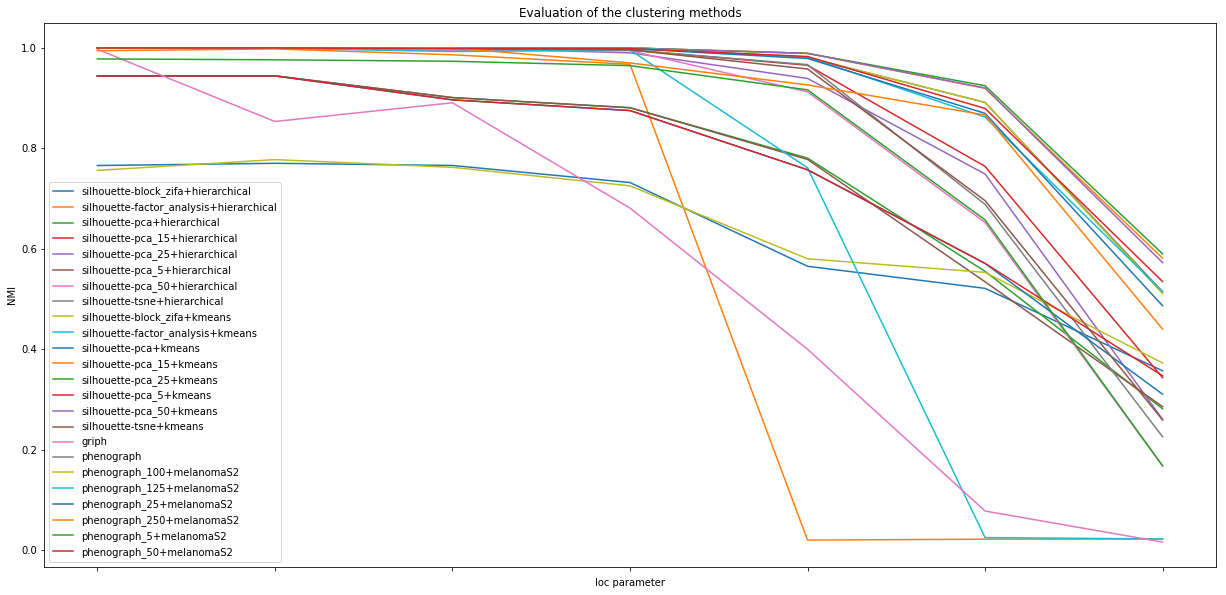

#### *Summary of the NMI score*

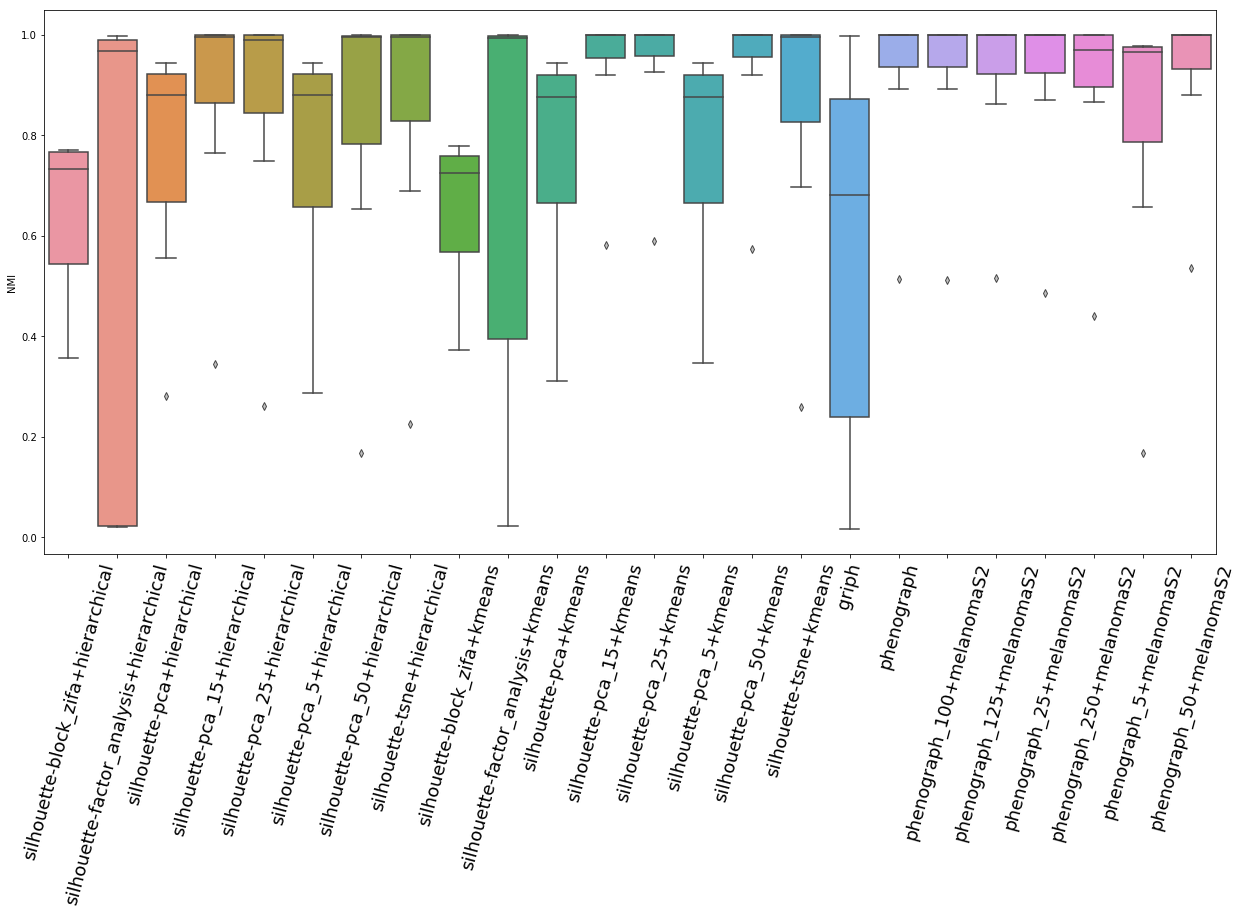

### *number of clusters = 15, de probability = 0.05*

silhouette-block_zifa+hierarchical  \
0.5                             0.013619   
0.75                            0.015395   
1.0                             0.118250   
1.25                            0.283113   
1.5                             0.326032   
2.0                             0.439414   
2.5                             0.355004   

      silhouette-factor_analysis+hierarchical  silhouette-pca+hierarchical  \
0.5                                  0.021129                     0.006981   
0.75                                 0.020048                     0.017214   
1.0                                  0.020748                     0.166574   
1.25                                 0.021142                     0.218544   
1.5                                  0.022891                     0.499569   
2.0                                  0.734014                     0.605300   
2.5                                  0.808360                     0.638109   

      silhouette-pca_15+hierarchical  silhouette-pca_25+hierarchical  \
0.5                         0.021837                        0.007997   
0.75                        0.017398                        0.018434   
1.0                         0.224708                        0.152721   
1.25                        0.547778                        0.523883   
1.5                         0.723685                        0.718806   
2.0                         0.865381                        0.860927   
2.5                         0.894943                        0.894945   

      silhouette-pca_5+hierarchical  silhouette-pca_50+hierarchical  \
0.5                        0.008812                        0.010862   
0.75                       0.026208                        0.018763   
1.0                        0.161645                        0.162772   
1.25                       0.213527                        0.370673   
1.5                        0.494756                        0.658004   
2.0                        0.586368                        0.845285   
2.5                        0.638109                        0.891538   

      silhouette-tsne+hierarchical  silhouette-block_zifa+kmeans  \
0.5                       0.010932                      0.012216   
0.75                      0.024289                      0.020795   
1.0                       0.153458                      0.113906   
1.25                      0.369524                      0.262714   
1.5                       0.699417                      0.330802   
2.0                       0.877277                      0.449107   
2.5                       0.896295                      0.363540   

      silhouette-factor_analysis+kmeans            ...             \
0.5                            0.024843            ...              
0.75                           0.022286            ...              
1.0                            0.018969            ...              
1.25                           0.021142            ...              
1.5                            0.455321            ...              
2.0                            0.742838            ...              
2.5                            0.795930            ...              

      silhouette-pca_50+kmeans  silhouette-tsne+kmeans     griph  phenograph  \
0.5                   0.009385                0.010455  0.009330    0.006369   
0.75                  0.028590                0.013292  0.015807    0.032250   
1.0                   0.184060                0.178483  0.020279    0.295335   
1.25                  0.623477                0.418257  0.038948    0.680118   
1.5                   0.714747                0.676313  0.162787    0.665685   
2.0                   0.847444                0.868845  0.297830    0.827081   
2.5                   0.896816                0.896295  0.566884    0.908121   

      phenograph_100+melanomaS2  phenograph_125+melanomaS2  \
0.5                    0.006637                   0.009211   
0.75               

#### *descriptive statistics*

silhouette-block_zifa+hierarchical  \
count                            7.000000   
mean                             0.221547   
std                              0.171458   
min                              0.013619   
25%                              0.066822   
50%                              0.283113   
75%                              0.340518   
max                              0.439414   

       silhouette-factor_analysis+hierarchical  silhouette-pca+hierarchical  \
count                                 7.000000                     7.000000   
mean                                  0.235476                     0.307470   
std                                   0.366590                     0.269947   
min                                   0.020048                     0.006981   
25%                                   0.020939                     0.091894   
50%                                   0.021142                     0.218544   
75%                                   0.378452                     0.552435   
max                                   0.808360                     0.638109   

       silhouette-pca_15+hierarchical  silhouette-pca_25+hierarchical  \
count                        7.000000                        7.000000   
mean                         0.470819                        0.453959   
std                          0.381482                        0.390392   
min                          0.017398                        0.007997   
25%                          0.123273                        0.085577   
50%                          0.547778                        0.523883   
75%                          0.794533                        0.789866   
max                          0.894943                        0.894945   

       silhouette-pca_5+hierarchical  silhouette-pca_50+hierarchical  \
count                       7.000000                        7.000000   
mean                        0.304204                        0.422557   
std                         0.264733                        0.377889   
min                         0.008812                        0.010862   
25%                         0.093927                        0.090768   
50%                         0.213527                        0.370673   
75%                         0.540562                        0.751645   
max                         0.638109                        0.891538   

       silhouette-tsne+hierarchical  silhouette-block_zifa+kmeans  \
count                      7.000000                      7.000000   
mean                       0.433027                      0.221869   
std                        0.389521                      0.173822   
min                        0.010932                      0.012216   
25%                        0.088873                      0.067350   
50%                        0.369524                      0.262714   
75%                        0.788347                      0.347171   
max                        0.896295                      0.449107   

       silhouette-factor_analysis+kmeans            ...             \
count                           7.000000            ...              
mean                            0.297333            ...              
std                             0.359561            ...              
min                             0.018969            ...              
25%                             0.021714            ...              
50%                             0.024843            ...              
75%                             0.599080            ...              
max                             0.795930            ...              

       silhouette-pca_50+kmeans  silhouette-tsne+kmeans     griph  phenograph  \
count                  7.000000                7.000000  7.000000    7.000000   
mean                   0.472074                0.437420  0.158838    0.487851   
std                    0.386616                0.383702  0.209053    0.373443   
min  

#### *NMI score over various loc values*

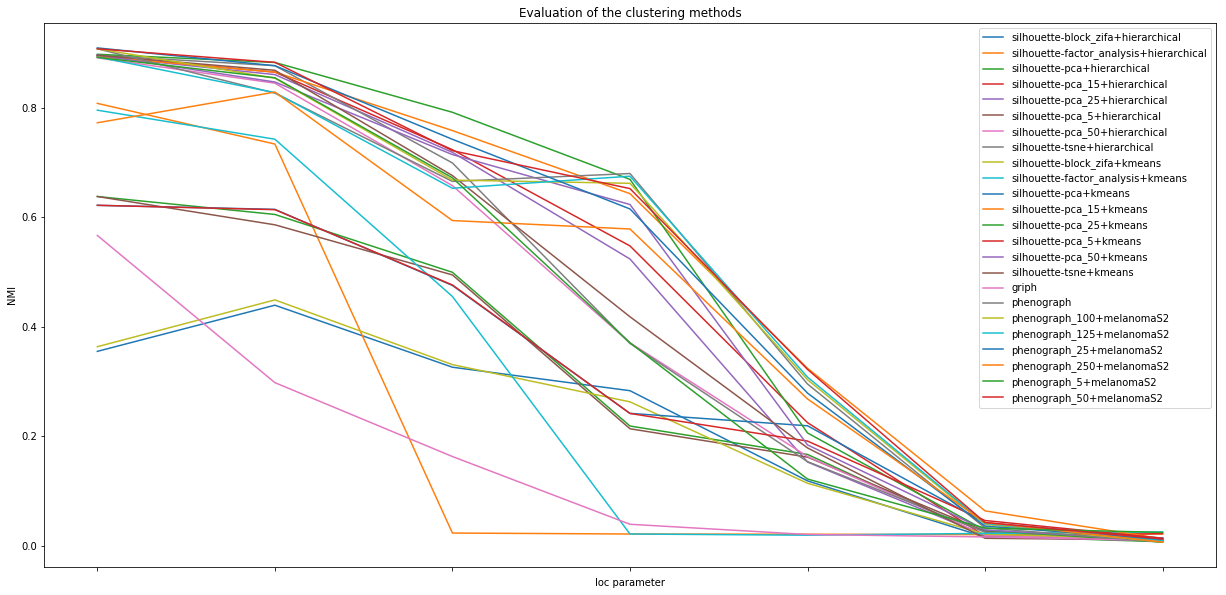

#### *Summary of the NMI score*

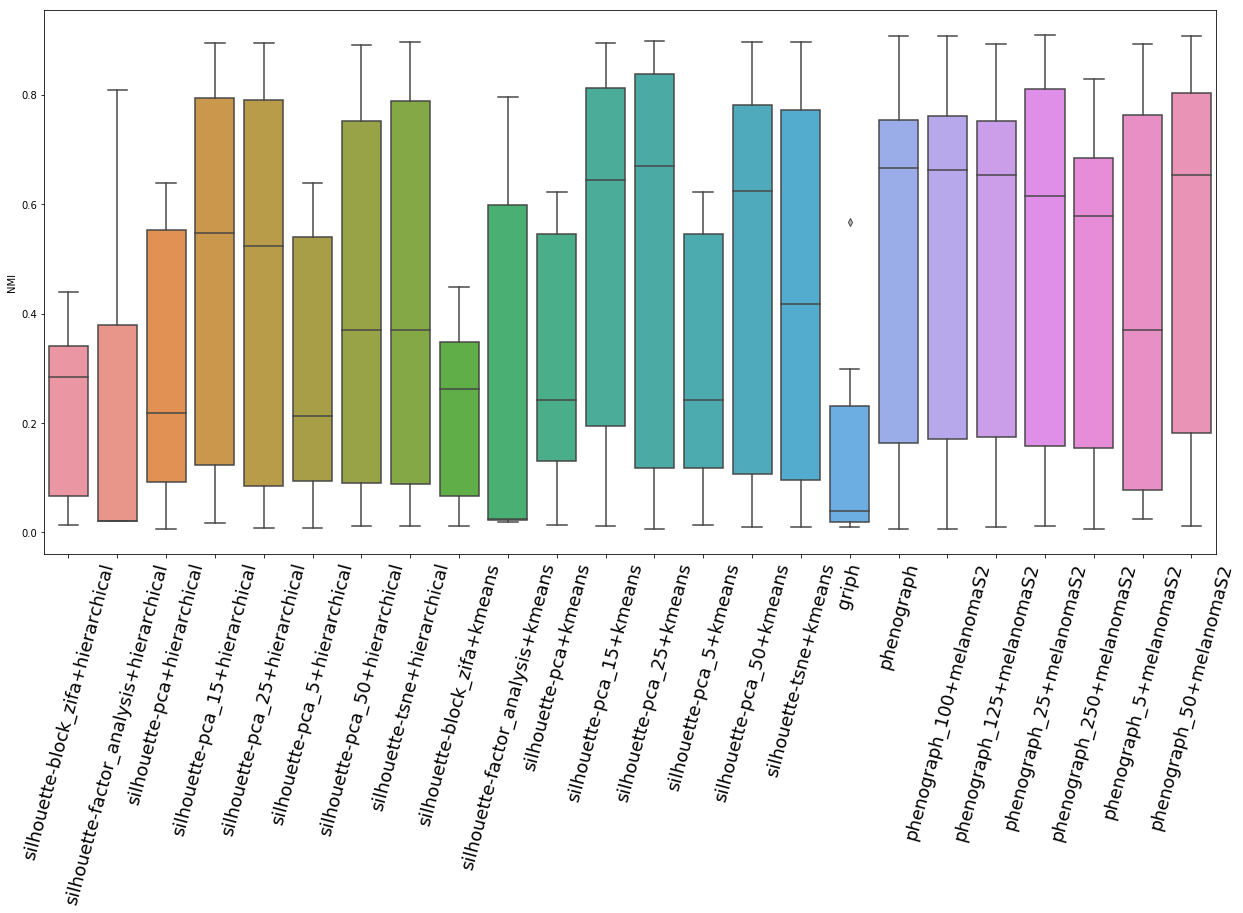

### *number of clusters = 15, de probability = 0.1*

silhouette-block_zifa+hierarchical  \
0.5                             0.088567   
0.75                            0.176138   
1.0                             0.327636   
1.25                            0.396467   
1.5                             0.377412   
2.0                             0.402131   
2.5                             0.504377   

      silhouette-factor_analysis+hierarchical  silhouette-pca+hierarchical  \
0.5                                  0.020463                     0.080486   
0.75                                 0.019283                     0.205515   
1.0                                  0.022356                     0.403261   
1.25                                 0.023082                     0.471717   
1.5                                  0.683623                     0.557947   
2.0                                  0.821696                     0.599232   
2.5                                  0.847837                     0.792008   

      silhouette-pca_15+hierarchical  silhouette-pca_25+hierarchical  \
0.5                         0.078407                        0.051368   
0.75                        0.200475                        0.207401   
1.0                         0.672506                        0.575572   
1.25                        0.856180                        0.789095   
1.5                         0.906843                        0.871651   
2.0                         0.904669                        0.904669   
2.5                         0.900543                        0.900543   

      silhouette-pca_5+hierarchical  silhouette-pca_50+hierarchical  \
0.5                        0.089448                        0.051565   
0.75                       0.227331                        0.182778   
1.0                        0.434002                        0.377128   
1.25                       0.491194                        0.766871   
1.5                        0.578023                        0.880605   
2.0                        0.599232                        0.903559   
2.5                        0.792008                        0.900543   

      silhouette-tsne+hierarchical  silhouette-block_zifa+kmeans  \
0.5                       0.050964                      0.084395   
0.75                      0.191602                      0.173652   
1.0                       0.472617                      0.338165   
1.25                      0.802808                      0.412850   
1.5                       0.873403                      0.376579   
2.0                       0.895937                      0.399908   
2.5                       0.900543                      0.513440   

      silhouette-factor_analysis+kmeans            ...             \
0.5                            0.020463            ...              
0.75                           0.020798            ...              
1.0                            0.022356            ...              
1.25                           0.308511            ...              
1.5                            0.686543            ...              
2.0                            0.824603            ...              
2.5                            0.846487            ...              

      silhouette-pca_50+kmeans  silhouette-tsne+kmeans     griph  phenograph  \
0.5                   0.082113                0.048188  0.019794    0.103496   
0.75                  0.245897                0.153328  0.041043    0.300365   
1.0                   0.795251                0.530389  0.099714    0.598270   
1.25                  0.863219                0.764279  0.222102    0.804880   
1.5                   0.891265                0.872058  0.386942    0.882496   
2.0                   0.894400                0.895937  0.503277    0.914493   
2.5                   0.900543                0.900543  0.716246    0.914639   

      phenograph_100+melanomaS2  phenograph_125+melanomaS2  \
0.5                    0.096871                   0.105527   
0.75               

#### *descriptive statistics*

silhouette-block_zifa+hierarchical  \
count                            7.000000   
mean                             0.324675   
std                              0.143786   
min                              0.088567   
25%                              0.251887   
50%                              0.377412   
75%                              0.399299   
max                              0.504377   

       silhouette-factor_analysis+hierarchical  silhouette-pca+hierarchical  \
count                                 7.000000                     7.000000   
mean                                  0.348334                     0.444309   
std                                   0.411059                     0.241397   
min                                   0.019283                     0.080486   
25%                                   0.021409                     0.304388   
50%                                   0.023082                     0.471717   
75%                                   0.752660                     0.578589   
max                                   0.847837                     0.792008   

       silhouette-pca_15+hierarchical  silhouette-pca_25+hierarchical  \
count                        7.000000                        7.000000   
mean                         0.645660                        0.614328   
std                          0.357135                        0.352843   
min                          0.078407                        0.051368   
25%                          0.436490                        0.391486   
50%                          0.856180                        0.789095   
75%                          0.902606                        0.886097   
max                          0.906843                        0.904669   

       silhouette-pca_5+hierarchical  silhouette-pca_50+hierarchical  \
count                       7.000000                        7.000000   
mean                        0.458748                        0.580436   
std                         0.236863                        0.367629   
min                         0.089448                        0.051565   
25%                         0.330667                        0.279953   
50%                         0.491194                        0.766871   
75%                         0.588627                        0.890574   
max                         0.792008                        0.903559   

       silhouette-tsne+hierarchical  silhouette-block_zifa+kmeans  \
count                      7.000000                      7.000000   
mean                       0.598268                      0.328427   
std                        0.360143                      0.148541   
min                        0.050964                      0.084395   
25%                        0.332110                      0.255908   
50%                        0.802808                      0.376579   
75%                        0.884670                      0.406379   
max                        0.900543                      0.513440   

       silhouette-factor_analysis+kmeans            ...             \
count                           7.000000            ...              
mean                            0.389966            ...              
std                             0.387270            ...              
min                             0.020463            ...              
25%                             0.021577            ...              
50%                             0.308511            ...              
75%                             0.755573            ...              
max                             0.846487            ...              

       silhouette-pca_50+kmeans  silhouette-tsne+kmeans     griph  phenograph  \
count                  7.000000                7.000000  7.000000    7.000000   
mean                   0.667527                0.594960  0.284160    0.645520   
std                    0.349026                0.362305  0.262088    0.326976   
min  

#### *NMI score over various loc values*

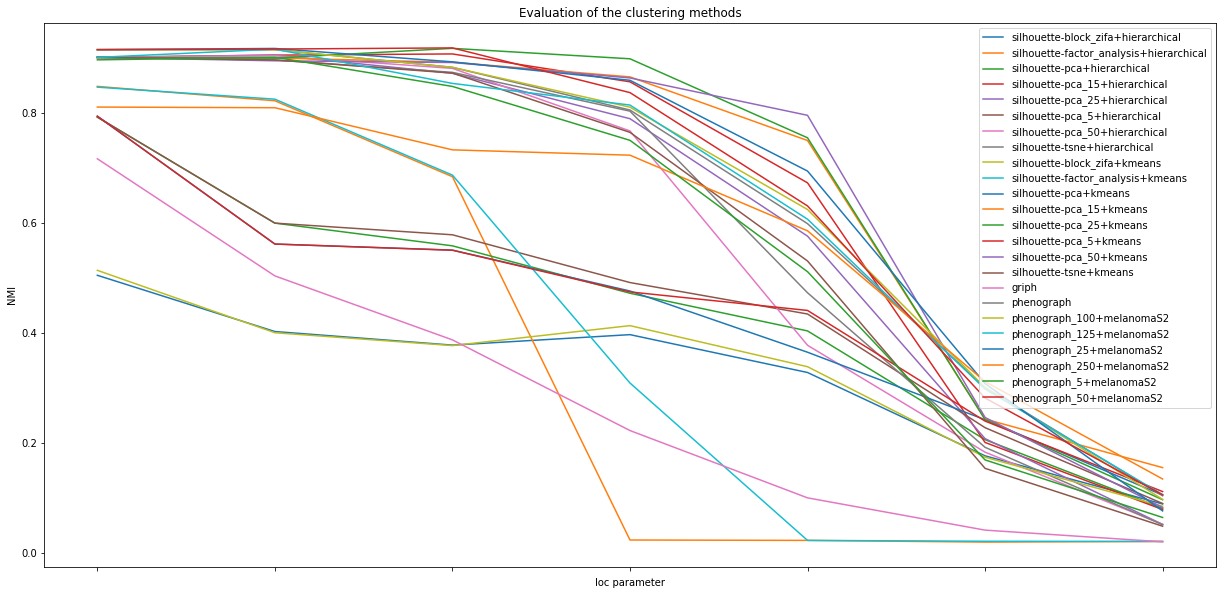

#### *Summary of the NMI score*

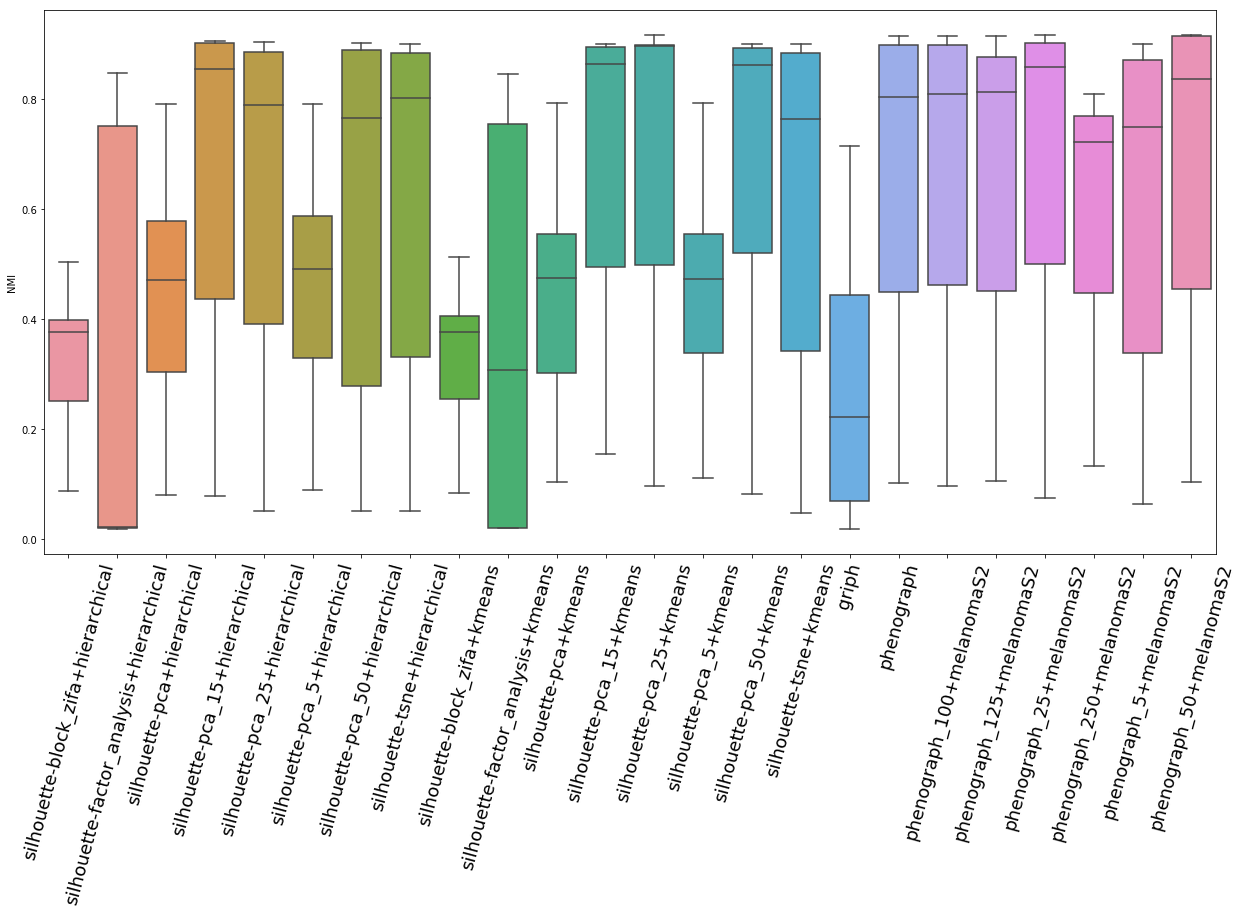

### *number of clusters = 15, de probability = 0.15*

silhouette-block_zifa+hierarchical  \
0.5                             0.263662   
0.75                            0.344940   
1.0                             0.421550   
1.25                            0.494785   
1.5                             0.475702   
2.0                             0.509513   
2.5                             0.625546   

      silhouette-factor_analysis+hierarchical  silhouette-pca+hierarchical  \
0.5                                  0.023618                     0.182349   
0.75                                 0.028243                     0.400935   
1.0                                  0.021376                     0.459638   
1.25                                 0.709513                     0.615958   
1.5                                  0.876448                     0.723268   
2.0                                  0.866921                     0.742746   
2.5                                  0.898563                     0.625792   

      silhouette-pca_15+hierarchical  silhouette-pca_25+hierarchical  \
0.5                         0.194234                        0.132174   
0.75                        0.586157                        0.569911   
1.0                         0.853477                        0.838186   
1.25                        0.894329                        0.888348   
1.5                         0.897931                        0.899011   
2.0                         0.899949                        0.899949   
2.5                         0.900543                        0.900543   

      silhouette-pca_5+hierarchical  silhouette-pca_50+hierarchical  \
0.5                        0.148925                        0.113943   
0.75                       0.403423                        0.470803   
1.0                        0.459014                        0.787046   
1.25                       0.634075                        0.896122   
1.5                        0.723268                        0.894457   
2.0                        0.742746                        0.899949   
2.5                        0.625792                        0.900543   

      silhouette-tsne+hierarchical  silhouette-block_zifa+kmeans  \
0.5                       0.107292                      0.279809   
0.75                      0.427072                      0.376375   
1.0                       0.825931                      0.429575   
1.25                      0.919366                      0.472894   
1.5                       0.893574                      0.479732   
2.0                       0.899800                      0.520273   
2.5                       0.899162                      0.570286   

      silhouette-factor_analysis+kmeans            ...             \
0.5                            0.023618            ...              
0.75                           0.026388            ...              
1.0                            0.286817            ...              
1.25                           0.724856            ...              
1.5                            0.875165            ...              
2.0                            0.860528            ...              
2.5                            0.898563            ...              

      silhouette-pca_50+kmeans  silhouette-tsne+kmeans     griph  phenograph  \
0.5                   0.211424                0.128963  0.017305    0.237163   
0.75                  0.701456                0.457471  0.028335    0.633091   
1.0                   0.888646                0.825598  0.174257    0.831399   
1.25                  0.895307                0.917444  0.352043    0.907657   
1.5                   0.899800                0.893574  0.507879    0.915825   
2.0                   0.899949                0.899800  0.664895    0.916916   
2.5                   0.926206                0.899162  0.804541    0.913515   

      phenograph_100+melanomaS2  phenograph_125+melanomaS2  \
0.5                    0.237329                   0.222393   
0.75               

#### *descriptive statistics*

silhouette-block_zifa+hierarchical  \
count                            7.000000   
mean                             0.447957   
std                              0.118014   
min                              0.263662   
25%                              0.383245   
50%                              0.475702   
75%                              0.502149   
max                              0.625546   

       silhouette-factor_analysis+hierarchical  silhouette-pca+hierarchical  \
count                                 7.000000                     7.000000   
mean                                  0.489240                     0.535812   
std                                   0.439101                     0.200587   
min                                   0.021376                     0.182349   
25%                                   0.025930                     0.430287   
50%                                   0.709513                     0.615958   
75%                                   0.871685                     0.674530   
max                                   0.898563                     0.742746   

       silhouette-pca_15+hierarchical  silhouette-pca_25+hierarchical  \
count                        7.000000                        7.000000   
mean                         0.746660                        0.732589   
std                          0.269014                        0.290485   
min                          0.194234                        0.132174   
25%                          0.719817                        0.704049   
50%                          0.894329                        0.888348   
75%                          0.898940                        0.899480   
max                          0.900543                        0.900543   

       silhouette-pca_5+hierarchical  silhouette-pca_50+hierarchical  \
count                       7.000000                        7.000000   
mean                        0.533892                        0.708980   
std                         0.211658                        0.305364   
min                         0.148925                        0.113943   
25%                         0.431219                        0.628924   
50%                         0.625792                        0.894457   
75%                         0.678671                        0.898036   
max                         0.742746                        0.900543   

       silhouette-tsne+hierarchical  silhouette-block_zifa+kmeans  \
count                      7.000000                      7.000000   
mean                       0.710314                      0.446992   
std                        0.317827                      0.096224   
min                        0.107292                      0.279809   
25%                        0.626501                      0.402975   
50%                        0.893574                      0.472894   
75%                        0.899481                      0.500003   
max                        0.919366                      0.570286   

       silhouette-factor_analysis+kmeans            ...             \
count                           7.000000            ...              
mean                            0.527991            ...              
std                             0.402358            ...              
min                             0.023618            ...              
25%                             0.156603            ...              
50%                             0.724856            ...              
75%                             0.867847            ...              
max                             0.898563            ...              

       silhouette-pca_50+kmeans  silhouette-tsne+kmeans     griph  phenograph  \
count                  7.000000                7.000000  7.000000    7.000000   
mean                   0.774684                0.717430  0.364179    0.765081   
std                    0.259636                0.306292  0.309389    0.254511   
min  

#### *NMI score over various loc values*

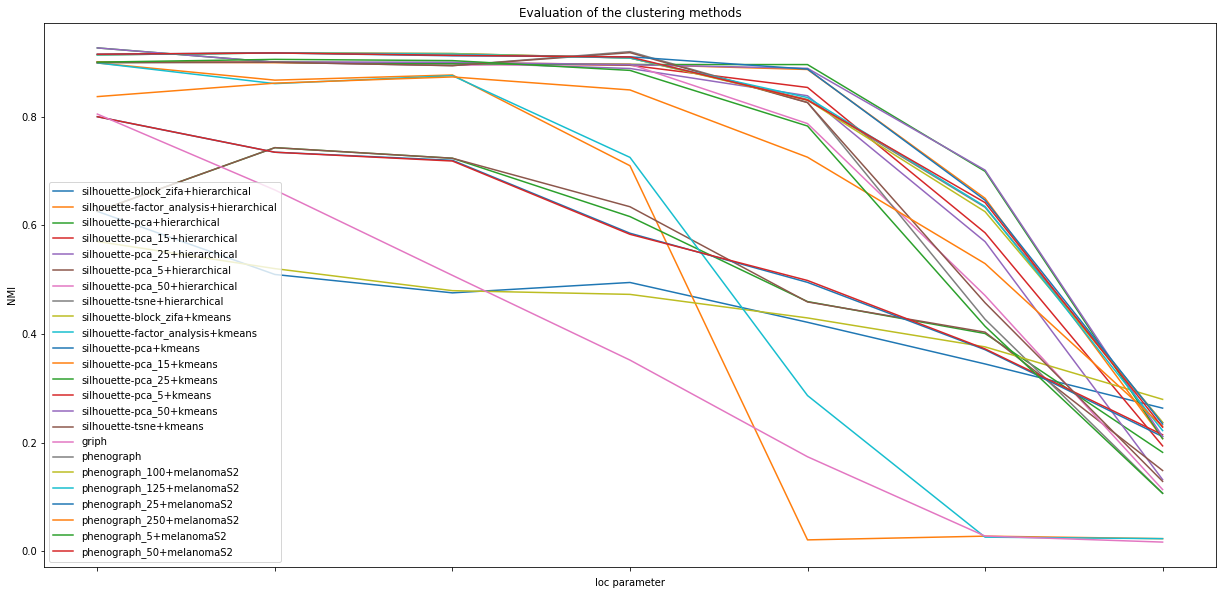

#### *Summary of the NMI score*

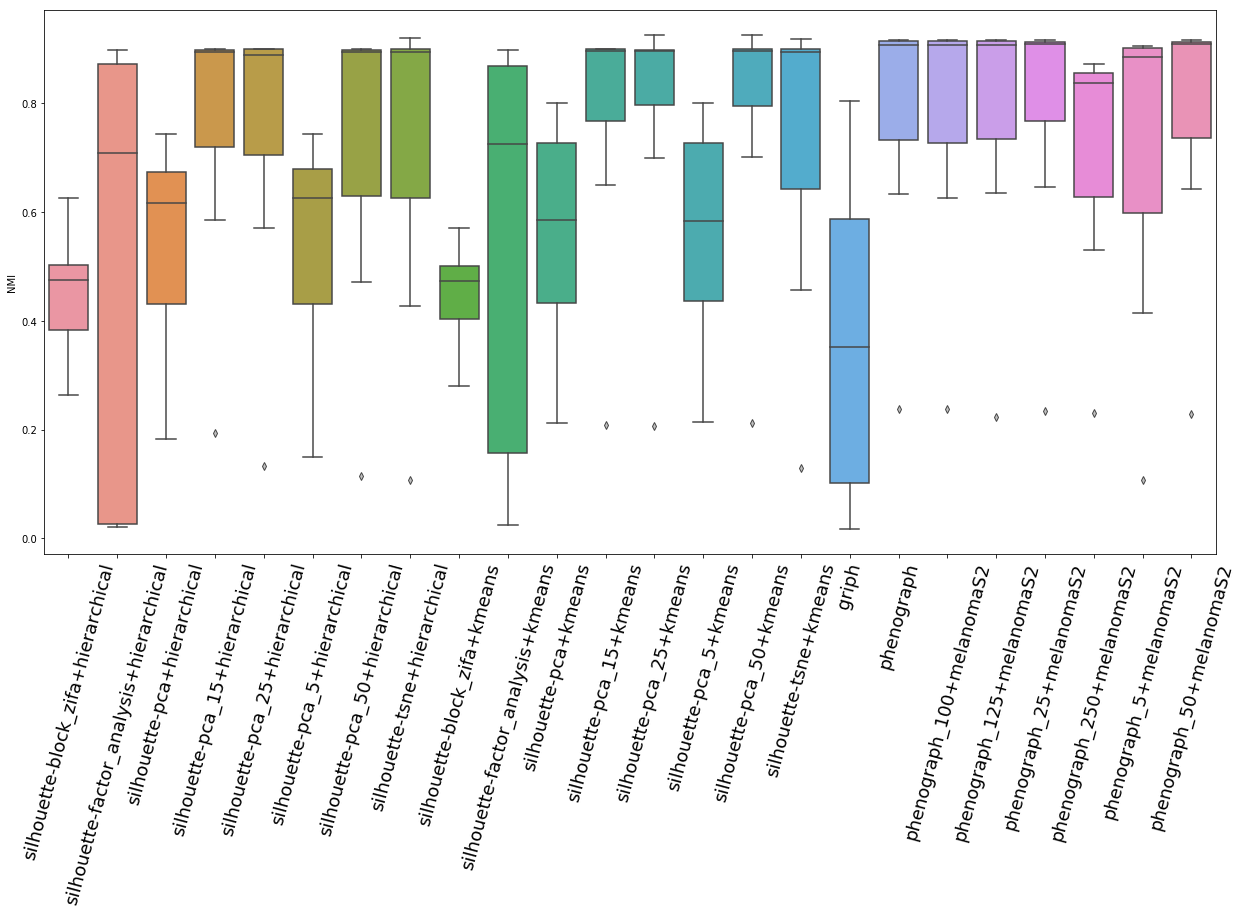

In [10]:
Markdown('## Evaluation of the clustering methods')
for idx, df in enumerate(df_list):
    params = param_combinations[idx]
    n_clusters = params[0]
    de_prob = params[1]
    df = df.rename(index=str, columns={"griph+melanomaS2": "griph", "phenograph+melanomaS2": "phenograph", "simlr+melanomaS2": "simlr",})
    Markdown('### *number of clusters = ' + str(n_clusters) + ', de probability = ' + str(de_prob) + '*')
    df
    Markdown('#### *descriptive statistics*')
    df.describe()
    Markdown('#### *NMI score over various loc values*')
    temp = plt.figure()
    ax = df.plot(title='Evaluation of the clustering methods',figsize=(21,10), kind='line')
    temp = ax.set_xlabel('loc parameter')
    #ax.set_xticklabels(df.index.values.astype(float))
    temp = ax.set_ylabel('NMI')
    ax = ax.invert_xaxis()
    plt.show()
    Markdown('#### *Summary of the NMI score*')
    flierprops = dict(markerfacecolor='0.75', markersize=5,
              linestyle='none')
    temp = plt.figure(figsize=(21,10))
    bp = sns.boxplot(data=df,flierprops=flierprops)
    bp = bp.set_ylabel('NMI')
    bp = plt.xticks(fontsize= 18, rotation=75)
    plt.show()

## Performance Comparison
Parses the statistics json file

In [11]:
import json
stats = None
with open('../simulated/23-02-2018/stats.json') as json_data:
    stats = json.load(json_data)
rules_runtime = stats['rules']
df_dict = pd.DataFrame(rules_runtime)
df_dict = df_dict.drop(columns=['all'], axis=1)

In [12]:
df_dict

factor_analysis      griph       pca  phenograph  \
max-runtime          4.754215  39.071136  7.221478    6.229139   
mean-runtime         4.286418  34.972114  4.828604    4.141275   
min-runtime          3.887013  30.566954  3.395144    3.354956   

              silhouette_hierarchical  silhouette_kmeans      simlr  \
max-runtime                 13.460599          16.748804  66.865615   
mean-runtime                 9.676970          10.555967  59.235242   
min-runtime                  6.263963           6.655851  50.874035   

                    tsne         zifa  
max-runtime   155.131993  1006.930979  
mean-runtime  112.076184   895.520182  
min-runtime    75.254758   682.796982

In [13]:
dfc_dict = pd.DataFrame()

In [14]:
dfc_dict['block_zifa+hierarchical'] = df_dict['zifa']+df_dict['silhouette_hierarchical']
dfc_dict['factor_analysis+hierarchical'] = df_dict['factor_analysis']+df_dict['silhouette_hierarchical']
dfc_dict['pca+hierarchical'] = df_dict['pca']+df_dict['silhouette_hierarchical']
dfc_dict['tsne+hierarchical'] = df_dict['tsne']+df_dict['silhouette_hierarchical']

dfc_dict['block_zifa+kmeans'] = df_dict['zifa']+df_dict['silhouette_kmeans']
dfc_dict['factor_analysis+kmeans'] = df_dict['factor_analysis']+df_dict['silhouette_kmeans']
dfc_dict['pca+kmeans'] = df_dict['pca']+df_dict['silhouette_kmeans']
dfc_dict['tsne+kmeans'] = df_dict['tsne']+df_dict['silhouette_kmeans']

dfc_dict['griph'] = df_dict['griph']
dfc_dict['phenograph'] = df_dict['phenograph']
dfc_dict['simlr'] = df_dict['simlr']

In [15]:
dfc_dict['factor_analysis+hierarchical'] = df_dict['zifa']+df_dict['silhouette_hierarchical']
dfc_dict['factor_analysis+hierarchical'] = df_dict['zifa']+df_dict['silhouette_hierarchical']
dfc_dict['factor_analysis+hierarchical'] = df_dict['zifa']+df_dict['silhouette_hierarchical']

In [16]:
dfc_dict

block_zifa+hierarchical  factor_analysis+hierarchical  \
max-runtime               1020.391577                   1020.391577   
mean-runtime               905.197152                    905.197152   
min-runtime                689.060945                    689.060945   

              pca+hierarchical  tsne+hierarchical  block_zifa+kmeans  \
max-runtime          20.682077         168.592592        1023.679782   
mean-runtime         14.505574         121.753154         906.076149   
min-runtime           9.659107          81.518721         689.452833   

              factor_analysis+kmeans  pca+kmeans  tsne+kmeans      griph  \
max-runtime                21.503019   23.970282   171.880796  39.071136   
mean-runtime               14.842385   15.384571   122.632151  34.972114   
min-runtime                10.542864   10.050995    81.910609  30.566954   

              phenograph      simlr  
max-runtime     6.229139  66.865615  
mean-runtime    4.141275  59.235242  
min-runtime     3.354956  50.874035

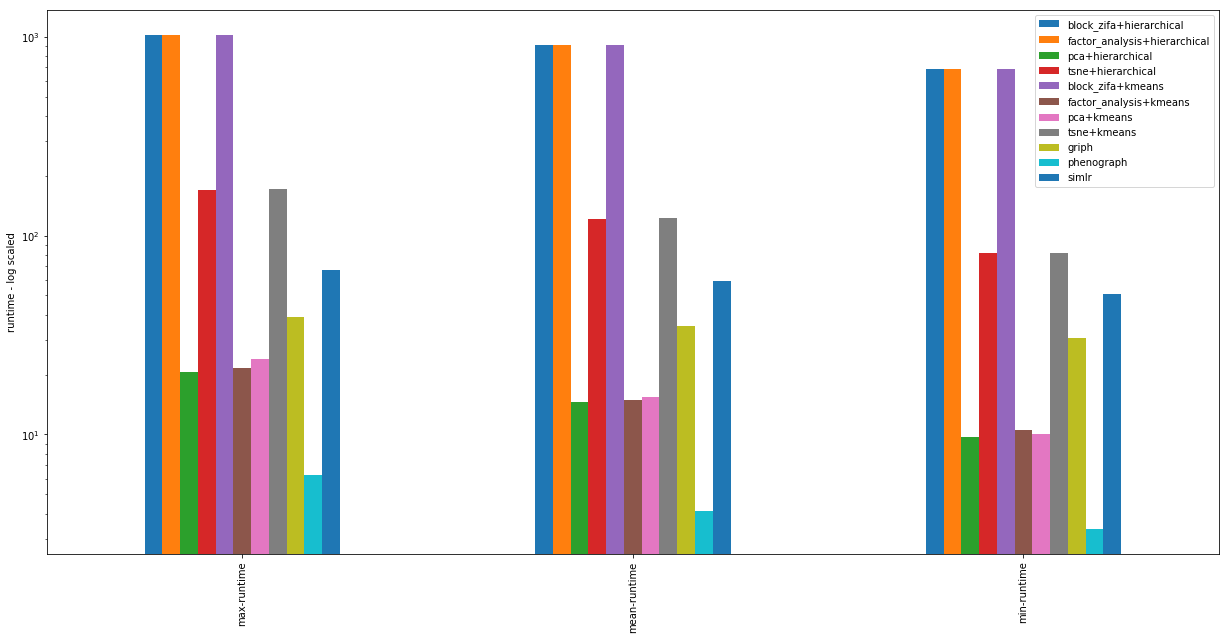

In [17]:
ax = dfc_dict.plot(kind='bar',figsize=(21,10), logy=True)
ax.set_ylabel('runtime - log scaled')

## 